## LENSPOP MODEL ADAPTED FOR SUBMILLIMETRE GALAXIES

## This notebook has three sections.

### Four flowcharts indicate the relationship between the routines in the model, the model's data input and output, where the model parameters are generated, and finally a chart of class inheritance.

### The order of running the three main routines in the model is shown next.

### Finally, a couple of example routines show how to extract the data from the results for analysis. The examples use fraction of sky frac=0.25, and lensed flux cutoff 0.10 mJy<br><br><br>

## The routines in the model


![main routines](flowchart4a.png)

## Model dataflow<br>

![dataflow of model](flowchart1a.png)

## Generation of model parameters

![main routines](flowchart3a.png)

## Inheritance

![main routines](flowchart5.png)

## Run the model

In [ ]:
pwd # check current dictionary is correct

In [346]:
%run MakeLensPop  # generates all lenses on sky  - takes ~6 hours - file is 6Gb

Om0 =  0.324
w = -1.0
h =  0.667
Om0 =  0.324
w = -1.0
h =  0.667
1038733782 who knows  minutes left
0
1038633782 1629.8650919979896  minutes left
1038533782 995.3714602834027  minutes left
1000
1038433782 766.3540374243117  minutes left
1038333782 645.0113199565803  minutes left
1038233782 570.7080711038857  minutes left
2000
1038133782 519.9797699617086  minutes left
1038033782 482.7775313445539  minutes left
1037933782 454.7615066212669  minutes left
3000
1037833782 433.0284030122105  minutes left
1037733782 417.51801010309913  minutes left
1037633782 404.5886149325389  minutes left
4000
1037533782 394.26762148882  minutes left
1037433782 384.00441663380786  minutes left
1037333782 374.8801209991508  minutes left
5000
1037233782 367.4511181471984  minutes left
1037133782 360.3751488569212  minutes left
1037033782 354.37367710449024  minutes left
6000
1036933782 348.8022607106574  minutes left
1036833782 344.5137531275889  minutes left
1036733782 340.0915156054228  minutes left
7000


60000
1021333782 280.3896871160553  minutes left
1021233782 280.50542993987654  minutes left
1021133782 280.51774390886476  minutes left
61000
1021033782 280.42106680010687  minutes left
1020933782 280.32633520778046  minutes left
1020833782 280.2119906083243  minutes left
62000
1020733782 280.0864917138678  minutes left
1020633782 280.0569334824271  minutes left
1020533782 280.0431759553352  minutes left
63000
1020433782 280.0650463948121  minutes left
1020333782 280.0262126731637  minutes left
1020233782 279.90745073404184  minutes left
64000
1020133782 279.7758349247924  minutes left
1020033782 279.6507751536529  minutes left
1019933782 279.485005689737  minutes left
65000
1019833782 279.3549459605436  minutes left
1019733782 279.2032898140033  minutes left
1019633782 279.07879803682187  minutes left
66000
1019533782 279.01577720454685  minutes left
1019433782 278.86354041247614  minutes left
1019333782 278.6899703128324  minutes left
67000
1019233782 278.5412817925966  minutes left

idealisedlenses/lenspopulation_submm_110000.pkl
120000
1003833782 267.3650533311472  minutes left
1003733782 267.223511598514  minutes left
1003633782 267.1344061296348  minutes left
121000
1003533782 267.0188266602414  minutes left
1003433782 266.9092491676996  minutes left
122000
1003333782 266.7996268896356  minutes left
1003233782 266.6679335882176  minutes left
1003133782 266.5251116804799  minutes left
123000
1003033782 266.39482368021754  minutes left
1002933782 266.2853260586207  minutes left
1002833782 266.2016216164931  minutes left
124000
1002733782 266.12180169827246  minutes left
1002633782 266.03217116405585  minutes left
1002533782 265.9519887126547  minutes left
125000
1002433782 265.8769268950753  minutes left
1002333782 265.80157767393234  minutes left
1002233782 265.7337819996238  minutes left
126000
1002133782 265.6751880691589  minutes left
1002033782 265.61838470335385  minutes left
1001933782 265.5812010318049  minutes left
127000
1001833782 265.52549333516436  m

986333782 254.4081877660776  minutes left
986233782 254.3297362424575  minutes left
182000
986133782 254.24493759210165  minutes left
986033782 254.166842516206  minutes left
985933782 254.08413299261596  minutes left
183000
985833782 254.02997544030248  minutes left
985733782 253.97359564978632  minutes left
985633782 253.90694764559478  minutes left
184000
985533782 253.82524538337003  minutes left
985433782 253.75162742252255  minutes left
985333782 253.66667502915848  minutes left
185000
985233782 253.5858823940239  minutes left
985133782 253.50761319483505  minutes left
985033782 253.45964179302197  minutes left
186000
984933782 253.38110861589158  minutes left
984833782 253.2999218158552  minutes left
984733782 253.21501330245977  minutes left
187000
984633782 253.13723783320887  minutes left
984533782 253.06968820600738  minutes left
984433782 252.9890613151669  minutes left
188000
984333782 252.91448906409855  minutes left
984233782 252.86618410556304  minutes left
984133782 25

968733782 244.9861287901755  minutes left
968633782 244.92200664070918  minutes left
243000
968533782 244.86834830497293  minutes left
968433782 244.80610873358458  minutes left
968333782 244.74231319684634  minutes left
244000
968233782 244.70370861304596  minutes left
968133782 244.647249190373  minutes left
968033782 244.57928772593  minutes left
245000
967933782 244.52862677346351  minutes left
967833782 244.46749821339478  minutes left
246000
967733782 244.40598804212252  minutes left
967633782 244.34375481093542  minutes left
967533782 244.28048149499557  minutes left
247000
967433782 244.241667296881  minutes left
967333782 244.18705093487057  minutes left
967233782 244.1250144199532  minutes left
248000
967133782 244.06305934956617  minutes left
967033782 243.99967745681914  minutes left
966933782 243.95093711686994  minutes left
249000
966833782 243.89619320872038  minutes left
966733782 243.83452883103706  minutes left
966633782 243.79974503062797  minutes left
idealisedlense

951133782 237.90517571520505  minutes left
304000
951033782 237.86259441190836  minutes left
950933782 237.8238025718277  minutes left
950833782 237.77143262986505  minutes left
305000
950733782 237.72319306690125  minutes left
950633782 237.6751032036387  minutes left
950533782 237.62403398895052  minutes left
306000
950433782 237.57765052393015  minutes left
950333782 237.52458840568474  minutes left
950233782 237.49098550908786  minutes left
307000
950133782 237.45776410513017  minutes left
950033782 237.40577898935507  minutes left
949933782 237.35348424486392  minutes left
308000
949833782 237.31085633656133  minutes left
949733782 237.25979549021662  minutes left
949633782 237.20897355153008  minutes left
309000
949533782 237.16412237281045  minutes left
949433782 237.12622435370068  minutes left
idealisedlenses/lenspopulation_submm_300000.pkl
310000
949333782 237.33370313370608  minutes left
949233782 237.31894551966803  minutes left
949133782 237.28161209801647  minutes left
31

933633782 232.10457427227303  minutes left
933533782 232.05995041851375  minutes left
365000
933433782 232.0163704431375  minutes left
933333782 231.9751681425163  minutes left
933233782 231.92876170783788  minutes left
366000
933133782 231.8884399266058  minutes left
933033782 231.86110799726896  minutes left
932933782 231.83580655737794  minutes left
367000
932833782 231.80943242521911  minutes left
932733782 231.77950233702722  minutes left
932633782 231.75014711596805  minutes left
368000
932533782 231.72384276839068  minutes left
932433782 231.69471450119153  minutes left
932333782 231.66697848030495  minutes left
369000
932233782 231.64650848250687  minutes left
932133782 231.61569305088742  minutes left
932033782 231.5882665100779  minutes left
idealisedlenses/lenspopulation_submm_360000.pkl
370000
931933782 231.73932491567217  minutes left
931833782 231.71404981628532  minutes left
931733782 231.68532781785447  minutes left
371000
931633782 231.66270648043337  minutes left
9315

425000
916033782 228.33732920055004  minutes left
915933782 228.3428499735127  minutes left
915833782 228.3243839549684  minutes left
426000
915733782 228.28721585929614  minutes left
915633782 228.25483502966432  minutes left
915533782 228.22067672905132  minutes left
427000
915433782 228.17833120615802  minutes left
915333782 228.15310181361525  minutes left
915233782 228.12140841383564  minutes left
428000
915133782 228.0933433604442  minutes left
915033782 228.0547001659337  minutes left
914933782 228.0240362700654  minutes left
429000
914833782 228.00628152629096  minutes left
914733782 227.98624516618975  minutes left
914633782 227.9768962272254  minutes left
idealisedlenses/lenspopulation_submm_420000.pkl
430000
914533782 228.14965166520338  minutes left
914433782 228.17576772693357  minutes left
914333782 228.19896511721475  minutes left
431000
914233782 228.19929971033545  minutes left
914133782 228.20241381216354  minutes left
914033782 228.16920249511656  minutes left
432000

486000
898433782 223.46291398853126  minutes left
898333782 223.42677117095883  minutes left
898233782 223.38818451991483  minutes left
487000
898133782 223.35413008127782  minutes left
898033782 223.31584175483505  minutes left
488000
897933782 223.27743024390574  minutes left
897833782 223.2388994505785  minutes left
897733782 223.19967410736737  minutes left
489000
897633782 223.17286796520904  minutes left
897533782 223.13946536484215  minutes left
897433782 223.1044502514551  minutes left
897333782 223.06582953242747  minutes left
idealisedlenses/lenspopulation_submm_480000.pkl
490000
897233782 223.14213928137397  minutes left
897133782 223.10085809374067  minutes left
491000
897033782 223.05797930807134  minutes left
896933782 223.03192133252318  minutes left
896833782 222.996706433885  minutes left
492000
896733782 222.958164023122  minutes left
896633782 222.9253234805662  minutes left
896533782 222.8862339679117  minutes left
493000
896433782 222.85025428490422  minutes left
8

547000
880833782 218.35599838118435  minutes left
880733782 218.3200082057478  minutes left
880633782 218.2841426111337  minutes left
548000
880533782 218.25202248408175  minutes left
880433782 218.22142802868342  minutes left
549000
880333782 218.19051241960503  minutes left
880233782 218.15109081932056  minutes left
880133782 218.11112081753924  minutes left
idealisedlenses/lenspopulation_submm_540000.pkl
550000
880033782 218.18743169864595  minutes left
879933782 218.15372823872357  minutes left
879833782 218.11633759452008  minutes left
551000
879733782 218.08759392099273  minutes left
879633782 218.05925251319002  minutes left
879533782 218.0224519929922  minutes left
552000
879433782 217.98928667065744  minutes left
879333782 217.95428074031108  minutes left
879233782 217.91797185111918  minutes left
553000
879133782 217.8857757316526  minutes left
879033782 217.85133837730515  minutes left
878933782 217.8248175242994  minutes left
554000
878833782 217.79553367961424  minutes lef

608000
863233782 213.32496836550612  minutes left
863133782 213.29434102071335  minutes left
863033782 213.26442992582272  minutes left
609000
862933782 213.23223185295262  minutes left
862833782 213.1966749761113  minutes left
862733782 213.16068626898894  minutes left
idealisedlenses/lenspopulation_submm_600000.pkl
610000
862633782 213.2337728995215  minutes left
862533782 213.1986851063055  minutes left
862433782 213.16752136710141  minutes left
611000
862333782 213.1372217427883  minutes left
862233782 213.10504914762944  minutes left
612000
862133782 213.0698531658372  minutes left
862033782 213.0343840591697  minutes left
861933782 212.99898696388559  minutes left
613000
861833782 212.96503445682063  minutes left
861733782 212.93221072700644  minutes left
861633782 212.9016420336372  minutes left
614000
861533782 212.87096427064358  minutes left
861433782 212.83788727472964  minutes left
861333782 212.80288664860424  minutes left
615000
861233782 212.77155632569054  minutes left


845633782 208.28099658658581  minutes left
845533782 208.24710285028658  minutes left
idealisedlenses/lenspopulation_submm_660000.pkl
670000
845433782 208.30709870854182  minutes left
845333782 208.27368015321738  minutes left
845233782 208.24052525821537  minutes left
671000
845133782 208.2100769822941  minutes left
845033782 208.17939476806617  minutes left
844933782 208.15663014473654  minutes left
672000
844833782 208.13130021861755  minutes left
844733782 208.10100661164807  minutes left
673000
844633782 208.06806428140388  minutes left
844533782 208.03467382604467  minutes left
844433782 208.00157073809314  minutes left
674000
844333782 207.96850534963048  minutes left
844233782 207.9380286760414  minutes left
844133782 207.90992583051823  minutes left
675000
844033782 207.87868703289016  minutes left
843933782 207.84570229257466  minutes left
843833782 207.81216237353766  minutes left
676000
843733782 207.78183290781448  minutes left
843633782 207.7485063664904  minutes left
843

730000
828133782 203.55386327860757  minutes left
828033782 203.52700980458172  minutes left
827933782 203.49988920548887  minutes left
731000
827833782 203.47256741907782  minutes left
827733782 203.44910965837758  minutes left
827633782 203.4249440246786  minutes left
732000
827533782 203.39761908276512  minutes left
827433782 203.37126625345425  minutes left
827333782 203.34344880837583  minutes left
733000
827233782 203.3167386293081  minutes left
827133782 203.28879159037712  minutes left
827033782 203.26113939987152  minutes left
734000
826933782 203.23975650321853  minutes left
826833782 203.22708428223225  minutes left
826733782 203.20023529386953  minutes left
735000
826633782 203.17697629344337  minutes left
826533782 203.14876489691176  minutes left
826433782 203.12190045969342  minutes left
736000
826333782 203.09551004829507  minutes left
826233782 203.07133918660554  minutes left
826133782 203.04412884129917  minutes left
737000
826033782 203.01819598891456  minutes left


791000
810533782 199.3932782451411  minutes left
810433782 199.3617724497354  minutes left
810333782 199.32936568335577  minutes left
792000
810233782 199.30157133064225  minutes left
810133782 199.2744166017601  minutes left
810033782 199.24228437925848  minutes left
793000
809933782 199.21177336051954  minutes left
809833782 199.17960271326416  minutes left
809733782 199.14756850929646  minutes left
794000
809633782 199.1176935933028  minutes left
809533782 199.08575200960175  minutes left
795000
809433782 199.05748184984094  minutes left
809333782 199.03021655869452  minutes left
809233782 198.99813981711017  minutes left
796000
809133782 198.96647654612198  minutes left
809033782 198.9343631070074  minutes left
808933782 198.90216106342442  minutes left
797000
808833782 198.8705931616029  minutes left
808733782 198.83931726096904  minutes left
808633782 198.8137433706765  minutes left
798000
808533782 198.78220960224243  minutes left
808433782 198.7543610352181  minutes left
808333

792933782 194.59353033372636  minutes left
792833782 194.56244367780872  minutes left
853000
792733782 194.53826203875073  minutes left
792633782 194.50844011370273  minutes left
792533782 194.47723745149227  minutes left
854000
792433782 194.4485215824516  minutes left
792333782 194.41774382604692  minutes left
792233782 194.38754207882096  minutes left
855000
792133782 194.35848800394777  minutes left
792033782 194.3292435430291  minutes left
791933782 194.30350869554567  minutes left
856000
791833782 194.27477893228027  minutes left
791733782 194.24421342483717  minutes left
857000
791633782 194.21209618662837  minutes left
791533782 194.1798143103426  minutes left
791433782 194.14989802338553  minutes left
858000
791333782 194.11901145414456  minutes left
791233782 194.09203709940178  minutes left
791133782 194.06558429499216  minutes left
859000
791033782 194.035334189391  minutes left
790933782 194.005214056384  minutes left
790833782 193.97578263589656  minutes left
idealisedlen

775333782 189.90423982649148  minutes left
914000
775233782 189.8775928625401  minutes left
775133782 189.8507768368094  minutes left
775033782 189.82087298331822  minutes left
915000
774933782 189.79124165591367  minutes left
774833782 189.76260996098557  minutes left
774733782 189.73252602043885  minutes left
916000
774633782 189.70352386235982  minutes left
774533782 189.6745592247088  minutes left
774433782 189.6488787362671  minutes left
917000
774333782 189.6208183430633  minutes left
774233782 189.59202808217634  minutes left
774133782 189.56410562161528  minutes left
918000
774033782 189.53712382007978  minutes left
773933782 189.5075273720032  minutes left
773833782 189.47760904860488  minutes left
919000
773733782 189.44968620319722  minutes left
773633782 189.42570848199702  minutes left
773533782 189.39699736225288  minutes left
idealisedlenses/lenspopulation_submm_910000.pkl
920000
773433782 189.42075772148226  minutes left
773333782 189.39161390460842  minutes left
773233

757733782 185.4784098470815  minutes left
975000
757633782 185.45269339164685  minutes left
757533782 185.42333273858625  minutes left
757433782 185.39438028863458  minutes left
976000
757333782 185.36929694950103  minutes left
757233782 185.34366518505814  minutes left
977000
757133782 185.31435268381534  minutes left
757033782 185.28630062607257  minutes left
756933782 185.25640448530876  minutes left
978000
756833782 185.22680116699544  minutes left
756733782 185.1978852894139  minutes left
756633782 185.17268646229346  minutes left
979000
756533782 185.14772936962666  minutes left
756433782 185.12243966319252  minutes left
756333782 185.09541542491863  minutes left
idealisedlenses/lenspopulation_submm_970000.pkl
980000
756233782 185.12225543452496  minutes left
756133782 185.09337135429377  minutes left
756033782 185.0644359501677  minutes left
981000
755933782 185.03636471833798  minutes left
755833782 185.01002402573744  minutes left
755733782 184.98294504735227  minutes left
982

740233782 181.0364972294026  minutes left
740133782 181.00717434859004  minutes left
1036000
740033782 180.97997175444576  minutes left
739933782 180.9555632082178  minutes left
1037000
739833782 180.92633766049963  minutes left
739733782 180.8986560740313  minutes left
739633782 180.86927966894984  minutes left
1038000
739533782 180.84115614268686  minutes left
739433782 180.81317581849342  minutes left
739333782 180.78441253237716  minutes left
1039000
739233782 180.75646677823516  minutes left
739133782 180.7341364536108  minutes left
739033782 180.7057369172292  minutes left
idealisedlenses/lenspopulation_submm_1030000.pkl
1040000
738933782 180.72863440014874  minutes left
738833782 180.69883657513762  minutes left
738733782 180.66791901445274  minutes left
1041000
738633782 180.6374092111481  minutes left
738533782 180.6067707318054  minutes left
738433782 180.58267642302752  minutes left
1042000
738333782 180.55503595431898  minutes left
738233782 180.52571744030834  minutes left

722833782 177.11458390149667  minutes left
1096000
722733782 177.12527489491399  minutes left
722633782 177.13928246141816  minutes left
722533782 177.15997318198058  minutes left
1097000
722433782 177.1750776261995  minutes left
722333782 177.18695168606766  minutes left
722233782 177.19284766368463  minutes left
1098000
722133782 177.19660637705314  minutes left
722033782 177.18647879872296  minutes left
721933782 177.17536046283467  minutes left
1099000
721833782 177.1565636573811  minutes left
721733782 177.1378466803724  minutes left
721633782 177.11212301995013  minutes left
idealisedlenses/lenspopulation_submm_1090000.pkl
1100000
721533782 177.1439346770628  minutes left
721433782 177.13219216948036  minutes left
721333782 177.1521442333311  minutes left
1101000
721233782 177.16936883166377  minutes left
721133782 177.18328338716748  minutes left
721033782 177.20477811449544  minutes left
1102000
720933782 177.2175962240095  minutes left
720833782 177.1962236007232  minutes left

705433782 178.17973751842152  minutes left
1156000
705333782 178.17902475236363  minutes left
705233782 178.19618646178554  minutes left
1157000
705133782 178.20858134441025  minutes left
705033782 178.2167448092065  minutes left
704933782 178.19748591243518  minutes left
1158000
704833782 178.18122573292078  minutes left
704733782 178.203739651609  minutes left
704633782 178.24382822881378  minutes left
1159000
704533782 178.2714570890747  minutes left
704433782 178.3212572379437  minutes left
704333782 178.3727811887847  minutes left
idealisedlenses/lenspopulation_submm_1150000.pkl
1160000
704233782 178.5579994744176  minutes left
704133782 178.61077477867127  minutes left
704033782 178.63730862385722  minutes left
1161000
703933782 178.65662246961935  minutes left
703833782 178.66923005641272  minutes left
1162000
703733782 178.6965323157832  minutes left
703633782 178.6965581924559  minutes left
703533782 178.68609412957474  minutes left
1163000
703433782 178.67791272163785  minute

688033782 176.5520108777973  minutes left
687933782 176.52067942086958  minutes left
1217000
687833782 176.49054778506635  minutes left
687733782 176.45904481306536  minutes left
687633782 176.42836738395874  minutes left
1218000
687533782 176.40097243209254  minutes left
687433782 176.3704355529003  minutes left
687333782 176.33871926472614  minutes left
1219000
687233782 176.31316572597635  minutes left
687133782 176.28721570381052  minutes left
idealisedlenses/lenspopulation_submm_1210000.pkl
1220000
687033782 176.29569235292394  minutes left
686933782 176.27045290357165  minutes left
686833782 176.24741662765774  minutes left
1221000
686733782 176.22163352664347  minutes left
686633782 176.19463894828613  minutes left
686533782 176.16611427846283  minutes left
1222000
686433782 176.13954361735622  minutes left
686333782 176.11508982046567  minutes left
686233782 176.09086285956775  minutes left
1223000
686133782 176.06641963523452  minutes left
686033782 176.03981665411254  minutes

670633782 171.79176134745492  minutes left
670533782 171.766641472466  minutes left
1277000
670433782 171.74130583823413  minutes left
670333782 171.7142808981767  minutes left
670233782 171.6895213073186  minutes left
1278000
670133782 171.6661886567298  minutes left
670033782 171.64041112419758  minutes left
1279000
669933782 171.61441410470616  minutes left
669833782 171.58699200904618  minutes left
669733782 171.5610697927721  minutes left
idealisedlenses/lenspopulation_submm_1270000.pkl
1280000
669633782 171.57506017100553  minutes left
669533782 171.5471853080389  minutes left
669433782 171.51926889421466  minutes left
669333782 171.49150573292843  minutes left
1281000
669233782 171.46942346869406  minutes left
669133782 171.44294553572234  minutes left
669033782 171.41530562438217  minutes left
1282000
668933782 171.38849330164933  minutes left
668833782 171.36068634107417  minutes left
1283000
668733782 171.3323320948691  minutes left
668633782 171.3046582634335  minutes left
6

653233782 167.40643868920034  minutes left
1337000
653133782 167.38007361367514  minutes left
653033782 167.3523555204661  minutes left
652933782 167.3254499179162  minutes left
1338000
652833782 167.29944962835694  minutes left
652733782 167.27159823797527  minutes left
652633782 167.24371036175822  minutes left
1339000
652533782 167.21694813876957  minutes left
652433782 167.19075946032248  minutes left
652333782 167.16576698948182  minutes left
idealisedlenses/lenspopulation_submm_1330000.pkl
1340000
652233782 167.17831604330522  minutes left
652133782 167.15190051018755  minutes left
652033782 167.12692757670385  minutes left
1341000
651933782 167.1026963657892  minutes left
651833782 167.08157848097196  minutes left
651733782 167.0676928680744  minutes left
1342000
651633782 167.05403039016497  minutes left
651533782 167.03685818042248  minutes left
651433782 167.02642327178756  minutes left
1343000
651333782 167.01063833833385  minutes left
651233782 166.99372558688844  minutes l

1397000
635833782 163.35916869509646  minutes left
635733782 163.33904972279956  minutes left
635633782 163.32110557795247  minutes left
1398000
635533782 163.30026841626704  minutes left
635433782 163.2778069128789  minutes left
635333782 163.25240199044845  minutes left
1399000
635233782 163.2271087899435  minutes left
635133782 163.2022112502211  minutes left
635033782 163.1779414312022  minutes left
idealisedlenses/lenspopulation_submm_1390000.pkl
1400000
634933782 163.18670659469691  minutes left
634833782 163.15865643939145  minutes left
634733782 163.133485743388  minutes left
1401000
634633782 163.11087964121504  minutes left
634533782 163.08285187660172  minutes left
634433782 163.06176439727082  minutes left
1402000
634333782 163.03851305082281  minutes left
634233782 163.01565638521168  minutes left
634133782 162.9917969529583  minutes left
1403000
634033782 162.9682002166423  minutes left
633933782 162.94289374329347  minutes left
633833782 162.91391044291066  minutes left


618433782 159.18276501162492  minutes left
618333782 159.15708974117686  minutes left
1458000
618233782 159.13061593589165  minutes left
618133782 159.10416984994188  minutes left
618033782 159.07728147967273  minutes left
1459000
617933782 159.05174065992145  minutes left
617833782 159.02497463256168  minutes left
617733782 158.99781349459838  minutes left
idealisedlenses/lenspopulation_submm_1450000.pkl
1460000
617633782 159.01042985790568  minutes left
617533782 158.9835017441448  minutes left
617433782 158.95632163881382  minutes left
1461000
617333782 158.93092945021374  minutes left
617233782 158.9043928920489  minutes left
617133782 158.8781633203532  minutes left
1462000
617033782 158.85143707440525  minutes left
616933782 158.82327080705943  minutes left
1463000
616833782 158.79747163030166  minutes left
616733782 158.77182398765692  minutes left
616633782 158.74533636049213  minutes left
1464000
616533782 158.7187735079279  minutes left
616433782 158.69245052512548  minutes l

1518000
601033782 154.8443974043729  minutes left
600933782 154.82016780773475  minutes left
600833782 154.79518474886973  minutes left
1519000
600733782 154.76945089537514  minutes left
600633782 154.74417735799662  minutes left
600533782 154.71546992659628  minutes left
idealisedlenses/lenspopulation_submm_1510000.pkl
1520000
600433782 154.71940480424095  minutes left
600333782 154.69500090024368  minutes left
600233782 154.6691086755176  minutes left
1521000
600133782 154.6449949488247  minutes left
600033782 154.62019274465314  minutes left
599933782 154.59486537569225  minutes left
1522000
599833782 154.5683977156414  minutes left
599733782 154.5409396754821  minutes left
599633782 154.51342751035085  minutes left
1523000
599533782 154.48884434282434  minutes left
599433782 154.46115879930025  minutes left
1524000
599333782 154.43370199197744  minutes left
599233782 154.4060862395969  minutes left
599133782 154.37699354284734  minutes left
1525000
599033782 154.34995196238862  min

583633782 150.4265731826144  minutes left
583533782 150.39876787012503  minutes left
1579000
583433782 150.37221056410394  minutes left
583333782 150.344235966532  minutes left
583233782 150.3167999733907  minutes left
idealisedlenses/lenspopulation_submm_1570000.pkl
1580000
583133782 150.31657312194338  minutes left
583033782 150.28978158452082  minutes left
1581000
582933782 150.26207321617832  minutes left
582833782 150.23419005225875  minutes left
582733782 150.20735807459988  minutes left
1582000
582633782 150.18022102219257  minutes left
582533782 150.1529413634297  minutes left
582433782 150.12529560785416  minutes left
1583000
582333782 150.09664421755824  minutes left
582233782 150.06736723648865  minutes left
582133782 150.03923602429097  minutes left
1584000
582033782 150.01222058758012  minutes left
581933782 149.98350239780152  minutes left
581833782 149.95824402039696  minutes left
1585000
581733782 149.93222950710546  minutes left
581633782 149.9060147874984  minutes lef

1639000
566233782 146.14381212372962  minutes left
566133782 146.11836348553877  minutes left
566033782 146.09421837681245  minutes left
idealisedlenses/lenspopulation_submm_1630000.pkl
1640000
565933782 146.0918612491185  minutes left
565833782 146.0662973488309  minutes left
565733782 146.04240627907743  minutes left
1641000
565633782 146.0173346603789  minutes left
565533782 145.99121198605957  minutes left
565433782 145.96474011021147  minutes left
1642000
565333782 145.94152380443342  minutes left
565233782 145.9157425656829  minutes left
565133782 145.88910794036235  minutes left
1643000
565033782 145.8635827935429  minutes left
564933782 145.83692470381644  minutes left
564833782 145.81051012095702  minutes left
1644000
564733782 145.7849628522036  minutes left
564633782 145.75796108952207  minutes left
1645000
564533782 145.73169480092432  minutes left
564433782 145.7064563379622  minutes left
564333782 145.68027305311222  minutes left
1646000
564233782 145.6539731268222  minut

idealisedlenses/lenspopulation_submm_1690000.pkl
1700000
548833782 141.81296702397606  minutes left
548733782 141.7857004354766  minutes left
548633782 141.7598304197033  minutes left
1701000
548533782 141.73477195014758  minutes left
548433782 141.70803744597632  minutes left
548333782 141.68143595681607  minutes left
1702000
548233782 141.65679101937593  minutes left
548133782 141.630724283246  minutes left
548033782 141.6050436760732  minutes left
1703000
547933782 141.5795476088625  minutes left
547833782 141.5535073682074  minutes left
547733782 141.52885277420626  minutes left
1704000
547633782 141.50435546236199  minutes left
547533782 141.4784741117209  minutes left
547433782 141.4541284635737  minutes left
1705000
547333782 141.4293042442164  minutes left
547233782 141.40594395566924  minutes left
1706000
547133782 141.38159248437432  minutes left
547033782 141.35811968911463  minutes left
546933782 141.33246338822445  minutes left
1707000
546833782 141.30776527570885  minutes

531533782 137.43562866424827  minutes left
531433782 137.41038386008123  minutes left
1761000
531333782 137.3850005425308  minutes left
531233782 137.35783808001207  minutes left
531133782 137.33078562801273  minutes left
1762000
531033782 137.30760350606087  minutes left
530933782 137.28201422235756  minutes left
530833782 137.25515980824565  minutes left
1763000
530733782 137.22867441683044  minutes left
530633782 137.20099678907482  minutes left
530533782 137.1733406766494  minutes left
1764000
530433782 137.1457368749241  minutes left
530333782 137.11872965282367  minutes left
1765000
530233782 137.09063820665403  minutes left
530133782 137.06300792176788  minutes left
530033782 137.03506313572706  minutes left
1766000
529933782 137.0069173096992  minutes left
529833782 136.98103922589965  minutes left
529733782 136.9580841357442  minutes left
1767000
529633782 136.93407343801587  minutes left
529533782 136.91032915614747  minutes left
529433782 136.8845444440737  minutes left
1768

514133782 133.05797891393044  minutes left
514033782 133.03622093117187  minutes left
1821000
513933782 133.01753182451932  minutes left
513833782 132.99373870449756  minutes left
1822000
513733782 132.96737133940692  minutes left
513633782 132.94009048548426  minutes left
513533782 132.91371495769593  minutes left
1823000
513433782 132.88629255311574  minutes left
513333782 132.85992381443094  minutes left
513233782 132.83250860348448  minutes left
1824000
513133782 132.80550966252088  minutes left
513033782 132.7782710168802  minutes left
512933782 132.75078374368087  minutes left
1825000
512833782 132.7239318226615  minutes left
512733782 132.69685441852053  minutes left
512633782 132.66958529512084  minutes left
1826000
512533782 132.6425684963982  minutes left
512433782 132.61500719508274  minutes left
512333782 132.58766494363311  minutes left
1827000
512233782 132.5603162796418  minutes left
512133782 132.5330628392102  minutes left
512033782 132.50538026520792  minutes left
182

1881000
496733782 128.50470322000123  minutes left
496633782 128.47776141730643  minutes left
496533782 128.45160472706874  minutes left
1882000
496433782 128.4266117671548  minutes left
496333782 128.3994203908512  minutes left
496233782 128.37113716990294  minutes left
1883000
496133782 128.3453890391376  minutes left
496033782 128.3220087429735  minutes left
1884000
495933782 128.29651019805075  minutes left
495833782 128.271200839708  minutes left
495733782 128.24529529142575  minutes left
1885000
495633782 128.21863968404605  minutes left
495533782 128.19553457140177  minutes left
495433782 128.16899325973478  minutes left
1886000
495333782 128.14317142651115  minutes left
495233782 128.1158803471345  minutes left
495133782 128.09052278518269  minutes left
1887000
495033782 128.06561468524637  minutes left
494933782 128.040410269347  minutes left
494833782 128.01518966046663  minutes left
1888000
494733782 127.98973907068759  minutes left
494633782 127.96361263622852  minutes left

479333782 124.22253902172181  minutes left
479233782 124.19484181452977  minutes left
1942000
479133782 124.16811806586848  minutes left
479033782 124.14024603698  minutes left
478933782 124.11284176745747  minutes left
1943000
478833782 124.08550863615328  minutes left
478733782 124.0586756135748  minutes left
478633782 124.03150702344598  minutes left
1944000
478533782 124.0044545722245  minutes left
478433782 123.97730301571184  minutes left
478333782 123.94978010240918  minutes left
1945000
478233782 123.92278303758033  minutes left
478133782 123.89548033495106  minutes left
478033782 123.8681062307415  minutes left
1946000
477933782 123.84124937420339  minutes left
477833782 123.81395681113526  minutes left
1947000
477733782 123.78693647790541  minutes left
477633782 123.75990658610253  minutes left
477533782 123.73278646915375  minutes left
1948000
477433782 123.70588755220463  minutes left
477333782 123.67854334409036  minutes left
477233782 123.65126945952062  minutes left
1949

2002000
461933782 119.61121104548235  minutes left
461833782 119.58374505264035  minutes left
461733782 119.5553336716734  minutes left
2003000
461633782 119.52743725373332  minutes left
461533782 119.49889255536333  minutes left
461433782 119.47025528064914  minutes left
2004000
461333782 119.44222647621359  minutes left
461233782 119.41379529881205  minutes left
461133782 119.38649766125546  minutes left
2005000
461033782 119.35853271230876  minutes left
460933782 119.33008521549604  minutes left
460833782 119.30150354219471  minutes left
2006000
460733782 119.27377915698429  minutes left
460633782 119.24526596011114  minutes left
2007000
460533782 119.21674370566916  minutes left
460433782 119.18942156993005  minutes left
460333782 119.1622371264411  minutes left
2008000
460233782 119.13432978454843  minutes left
460133782 119.10609251521636  minutes left
460033782 119.0776329889206  minutes left
2009000
459933782 119.05003984154277  minutes left
459833782 119.02222061239333  minute

444633782 114.95073116281112  minutes left
444533782 114.92288063503354  minutes left
444433782 114.89459690858165  minutes left
2063000
444333782 114.8681098117904  minutes left
444233782 114.84006521566042  minutes left
2064000
444133782 114.81204334870708  minutes left
444033782 114.78370039315499  minutes left
443933782 114.75554924095908  minutes left
2065000
443833782 114.72743998115658  minutes left
443733782 114.70005748981286  minutes left
443633782 114.6719450022956  minutes left
2066000
443533782 114.64558191017822  minutes left
443433782 114.61756154078229  minutes left
443333782 114.58932122912279  minutes left
2067000
443233782 114.56153721479454  minutes left
443133782 114.53366554268648  minutes left
443033782 114.50545388881324  minutes left
2068000
442933782 114.47756445660866  minutes left
442833782 114.4494395390937  minutes left
442733782 114.42288540918075  minutes left
2069000
442633782 114.39528251926781  minutes left
442533782 114.36707093049417  minutes left
4

2123000
427233782 110.24754609730931  minutes left
427133782 110.21949425562093  minutes left
427033782 110.19278750284887  minutes left
2124000
426933782 110.1649033371332  minutes left
426833782 110.13758147145717  minutes left
426733782 110.11042651014236  minutes left
2125000
426633782 110.08304899451878  minutes left
426533782 110.05536379950699  minutes left
426433782 110.02733053568039  minutes left
2126000
426333782 109.99975318164965  minutes left
426233782 109.97335295408293  minutes left
426133782 109.94664186548965  minutes left
2127000
426033782 109.92013245255148  minutes left
425933782 109.89352681670043  minutes left
425833782 109.86674124543813  minutes left
2128000
425733782 109.84026631648096  minutes left
425633782 109.81347499755704  minutes left
425533782 109.78693671009897  minutes left
2129000
425433782 109.76066469876973  minutes left
425333782 109.7339186953313  minutes left
425233782 109.70746262947065  minutes left
idealisedlenses/lenspopulation_submm_212000

409933782 105.61819600363063  minutes left
409833782 105.5914985775832  minutes left
2184000
409733782 105.56514377482388  minutes left
409633782 105.53858432628515  minutes left
409533782 105.51204582785886  minutes left
2185000
409433782 105.4858927761927  minutes left
409333782 105.45926824374042  minutes left
409233782 105.43282657780654  minutes left
2186000
409133782 105.40667789703237  minutes left
409033782 105.38021579205999  minutes left
408933782 105.35419372972919  minutes left
2187000
408833782 105.3278258746561  minutes left
408733782 105.30148249515005  minutes left
408633782 105.27541459183635  minutes left
2188000
408533782 105.24911710168797  minutes left
408433782 105.22260735355937  minutes left
408333782 105.19610031715762  minutes left
2189000
408233782 105.16980641660301  minutes left
408133782 105.14320964506591  minutes left
idealisedlenses/lenspopulation_submm_2180000.pkl
2190000
408033782 105.1320079484587  minutes left
407933782 105.10556305836391  minutes l

2244000
392533782 101.01965956735923  minutes left
392433782 100.99286320207966  minutes left
2245000
392333782 100.96602680294815  minutes left
392233782 100.93893449607172  minutes left
392133782 100.91255981468977  minutes left
2246000
392033782 100.88581374968005  minutes left
391933782 100.85969130058325  minutes left
391833782 100.83266769718466  minutes left
2247000
391733782 100.805811967788  minutes left
391633782 100.77838557620021  minutes left
391533782 100.75092096210302  minutes left
2248000
391433782 100.72350844601752  minutes left
391333782 100.69601876788596  minutes left
391233782 100.66895184363148  minutes left
2249000
391133782 100.64277262062066  minutes left
391033782 100.61578866589159  minutes left
390933782 100.58836891069315  minutes left
idealisedlenses/lenspopulation_submm_2240000.pkl
2250000
390833782 100.57361934609368  minutes left
390733782 100.54580730603973  minutes left
390633782 100.51779144328917  minutes left
2251000
390533782 100.49087258218019 

374933782 96.34139006398716  minutes left
374833782 96.31499253966639  minutes left
2306000
374733782 96.28932317077737  minutes left
374633782 96.26284096883548  minutes left
374533782 96.23653288282586  minutes left
2307000
374433782 96.21037344348255  minutes left
374333782 96.18405702746941  minutes left
374233782 96.15781740806328  minutes left
2308000
374133782 96.13186222427885  minutes left
374033782 96.10559379828331  minutes left
373933782 96.07945110129054  minutes left
2309000
373833782 96.05241249208726  minutes left
373733782 96.02486920639254  minutes left
idealisedlenses/lenspopulation_submm_2300000.pkl
2310000
373633782 96.00966588696234  minutes left
373533782 95.98235407811649  minutes left
373433782 95.95573290825932  minutes left
2311000
373333782 95.92867892082795  minutes left
373233782 95.90146534463052  minutes left
373133782 95.8739665162552  minutes left
2312000
373033782 95.84693501936268  minutes left
372933782 95.81948462898454  minutes left
372833782 95.7

357233782 91.6486544597995  minutes left
357133782 91.62139563591955  minutes left
357033782 91.59429708531815  minutes left
2368000
356933782 91.56748820229213  minutes left
356833782 91.54028698772419  minutes left
356733782 91.5136883993323  minutes left
2369000
356633782 91.48703237776921  minutes left
356533782 91.45974347902903  minutes left
356433782 91.43250032027308  minutes left
idealisedlenses/lenspopulation_submm_2360000.pkl
2370000
356333782 91.41611891138442  minutes left
356233782 91.38908989801497  minutes left
356133782 91.36252900647332  minutes left
2371000
356033782 91.3365587138814  minutes left
355933782 91.30987994870772  minutes left
2372000
355833782 91.28264012588578  minutes left
355733782 91.25525185660032  minutes left
355633782 91.22808688355293  minutes left
2373000
355533782 91.20081563162923  minutes left
355433782 91.17386461756824  minutes left
355333782 91.146541279803  minutes left
2374000
355233782 91.1205300122572  minutes left
355133782 91.093388

2429000
339433782 86.94188415476705  minutes left
339333782 86.91583792001178  minutes left
idealisedlenses/lenspopulation_submm_2420000.pkl
2430000
339233782 86.89904480927181  minutes left
339133782 86.8720553190734  minutes left
339033782 86.84503537007366  minutes left
2431000
338933782 86.81807656163647  minutes left
338833782 86.79094546716857  minutes left
338733782 86.76485630955625  minutes left
2432000
338633782 86.73788672954196  minutes left
338533782 86.71073810864922  minutes left
338433782 86.68366705621294  minutes left
2433000
338333782 86.65669307626557  minutes left
338233782 86.6298114758059  minutes left
338133782 86.60267858777893  minutes left
2434000
338033782 86.57562864889344  minutes left
337933782 86.54966393490446  minutes left
337833782 86.52271082380786  minutes left
2435000
337733782 86.49589717732765  minutes left
337633782 86.46882767547646  minutes left
337533782 86.44179887572832  minutes left
2436000
337433782 86.41506546495319  minutes left
3373337

321733782 82.27895389494383  minutes left
2491000
321633782 82.25236579967996  minutes left
321533782 82.22541100878138  minutes left
321433782 82.19848897044442  minutes left
2492000
321333782 82.17184478831402  minutes left
321233782 82.14590617367435  minutes left
321133782 82.11906671446454  minutes left
2493000
321033782 82.09244954878878  minutes left
320933782 82.06555700523761  minutes left
320833782 82.03869528926134  minutes left
2494000
320733782 82.01202050658547  minutes left
320633782 81.98552266522299  minutes left
2495000
320533782 81.95868164972124  minutes left
320433782 81.93273413699659  minutes left
320333782 81.90594294374256  minutes left
2496000
320233782 81.87911278869325  minutes left
320133782 81.8524621083478  minutes left
320033782 81.82556150442572  minutes left
2497000
319933782 81.79883235301477  minutes left
319833782 81.77223349733951  minutes left
319733782 81.74547966263448  minutes left
2498000
319633782 81.7197026673013  minutes left
319533782 81.6

2552000
304033782 77.73009026835284  minutes left
303933782 77.704154334315  minutes left
2553000
303833782 77.67828892443443  minutes left
303733782 77.65241449904964  minutes left
303633782 77.62647029762626  minutes left
2554000
303533782 77.60078661497765  minutes left
303433782 77.5750148538128  minutes left
303333782 77.54911094073849  minutes left
2555000
303233782 77.52317935281572  minutes left
303133782 77.49738672675252  minutes left
303033782 77.47141193552278  minutes left
2556000
302933782 77.44547280441017  minutes left
302833782 77.41911487343158  minutes left
302733782 77.39258637009773  minutes left
2557000
302633782 77.36649107820894  minutes left
302533782 77.33992574676309  minutes left
302433782 77.31319075843605  minutes left
2558000
302333782 77.28695161751992  minutes left
302233782 77.26060739358535  minutes left
302133782 77.23386863464688  minutes left
2559000
302033782 77.20731624835042  minutes left
301933782 77.18118917517474  minutes left
301833782 77.15

2614000
286333782 73.10889104204351  minutes left
286233782 73.08288472798768  minutes left
286133782 73.05676052262457  minutes left
2615000
286033782 73.03037676962141  minutes left
285933782 73.00370244722403  minutes left
2616000
285833782 72.97705411821485  minutes left
285733782 72.9504084611837  minutes left
285633782 72.92376737916334  minutes left
2617000
285533782 72.89714271271241  minutes left
285433782 72.8711974288852  minutes left
285333782 72.84479709714984  minutes left
2618000
285233782 72.81838791966847  minutes left
285133782 72.79176150892822  minutes left
285033782 72.765105446405  minutes left
2619000
284933782 72.73873756268479  minutes left
284833782 72.71214611720265  minutes left
284733782 72.6854879914936  minutes left
idealisedlenses/lenspopulation_submm_2610000.pkl
2620000
284633782 72.66740858853171  minutes left
284533782 72.64058679900532  minutes left
284433782 72.61406203797769  minutes left
2621000
284333782 72.58735609422182  minutes left
284233782 

268633782 68.54671904545789  minutes left
2676000
268533782 68.52097538666163  minutes left
268433782 68.495134156729  minutes left
268333782 68.46935276686197  minutes left
2677000
268233782 68.44362391653495  minutes left
268133782 68.41806723572732  minutes left
268033782 68.39219339835672  minutes left
2678000
267933782 68.3664500675398  minutes left
267833782 68.3405943336695  minutes left
267733782 68.31415986358759  minutes left
2679000
267633782 68.28776679357524  minutes left
267533782 68.2612603474736  minutes left
idealisedlenses/lenspopulation_submm_2670000.pkl
2680000
267433782 68.24182723602722  minutes left
267333782 68.21558657450905  minutes left
267233782 68.18902045024976  minutes left
2681000
267133782 68.16265898844362  minutes left
267033782 68.13632231451088  minutes left
266933782 68.10976456941184  minutes left
2682000
266833782 68.08383744450241  minutes left
266733782 68.05762083521604  minutes left
266633782 68.03107233951754  minutes left
2683000
266533782 

250833782 63.928579811668  minutes left
2738000
250733782 63.9024533114751  minutes left
250633782 63.876077275418496  minutes left
250533782 63.84967894256097  minutes left
2739000
250433782 63.82359325915732  minutes left
250333782 63.79780085246792  minutes left
idealisedlenses/lenspopulation_submm_2730000.pkl
2740000
250233782 63.77816723396433  minutes left
250133782 63.75170179152312  minutes left
250033782 63.72508186804179  minutes left
2741000
249933782 63.69859645803579  minutes left
249833782 63.67200654375214  minutes left
249733782 63.645403952403704  minutes left
2742000
249633782 63.619527649007026  minutes left
249533782 63.59347097198219  minutes left
249433782 63.56711666034308  minutes left
2743000
249333782 63.54085903547819  minutes left
249233782 63.514498995767894  minutes left
249133782 63.48811224601359  minutes left
2744000
249033782 63.461896260700335  minutes left
248933782 63.43555911215497  minutes left
248833782 63.40974784969966  minutes left
2745000
248

2799000
233233782 59.3560392891073  minutes left
233133782 59.329699198828315  minutes left
idealisedlenses/lenspopulation_submm_2790000.pkl
2800000
233033782 59.3093312205707  minutes left
232933782 59.28300378604364  minutes left
232833782 59.25715168019749  minutes left
2801000
232733782 59.231411149008  minutes left
232633782 59.20549555071702  minutes left
232533782 59.179769299865  minutes left
2802000
232433782 59.153862394460354  minutes left
232333782 59.128009232601116  minutes left
232233782 59.10173076785422  minutes left
2803000
232133782 59.075605121814945  minutes left
232033782 59.04988682953362  minutes left
231933782 59.02357012899067  minutes left
2804000
231833782 58.99745312687789  minutes left
231733782 58.97114810084868  minutes left
231633782 58.9449317792974  minutes left
2805000
231533782 58.91880685207958  minutes left
231433782 58.892541057526095  minutes left
231333782 58.866407353869484  minutes left
2806000
231233782 58.84078529425293  minutes left
231133

idealisedlenses/lenspopulation_submm_2850000.pkl
2860000
215633782 54.815170497124306  minutes left
215533782 54.78967842189468  minutes left
215433782 54.764149828594434  minutes left
2861000
215333782 54.73870697351753  minutes left
215233782 54.71296726196422  minutes left
215133782 54.687750927347196  minutes left
2862000
215033782 54.66223364664674  minutes left
214933782 54.636462392721896  minutes left
214833782 54.61090016854135  minutes left
2863000
214733782 54.585235084680306  minutes left
214633782 54.55948951585837  minutes left
214533782 54.533607304273616  minutes left
2864000
214433782 54.50744948924107  minutes left
214333782 54.4811793882619  minutes left
214233782 54.45498071973285  minutes left
2865000
214133782 54.429179226876975  minutes left
214033782 54.40352494699532  minutes left
213933782 54.377321747406725  minutes left
2866000
213833782 54.35153365378771  minutes left
213733782 54.32537406442721  minutes left
213633782 54.299226922677775  minutes left
28670

198133782 50.317758049235884  minutes left
2921000
198033782 50.29200019128437  minutes left
197933782 50.26597086878062  minutes left
2922000
197833782 50.23996709574806  minutes left
197733782 50.21387844490035  minutes left
197633782 50.18825850812703  minutes left
2923000
197533782 50.16237726740724  minutes left
197433782 50.13630644167882  minutes left
197333782 50.110253983966906  minutes left
2924000
197233782 50.084388979886704  minutes left
197133782 50.0582838067677  minutes left
197033782 50.03219559786346  minutes left
2925000
196933782 50.00628571691899  minutes left
196833782 49.98069143483245  minutes left
196733782 49.95500879238849  minutes left
2926000
196633782 49.92936130423366  minutes left
196533782 49.903318437155036  minutes left
196433782 49.87724584338261  minutes left
2927000
196333782 49.85135652352141  minutes left
196233782 49.82531038467261  minutes left
196133782 49.799638376736944  minutes left
2928000
196033782 49.7739050005403  minutes left
195933782

2982000
180533782 45.82124922654643  minutes left
180433782 45.7952985561963  minutes left
180333782 45.769353468410145  minutes left
2983000
180233782 45.743764760400495  minutes left
180133782 45.71790493031869  minutes left
180033782 45.692408345632515  minutes left
2984000
179933782 45.666743394631084  minutes left
179833782 45.642134293301226  minutes left
179733782 45.61776489187688  minutes left
2985000
179633782 45.59280189096436  minutes left
179533782 45.56762390440068  minutes left
179433782 45.54297778035125  minutes left
2986000
179333782 45.51808755648486  minutes left
179233782 45.492921966206936  minutes left
179133782 45.46730594310634  minutes left
2987000
179033782 45.441691171543916  minutes left
178933782 45.416013830063484  minutes left
178833782 45.39062434334531  minutes left
2988000
178733782 45.36507684524415  minutes left
178633782 45.33946503508863  minutes left
178533782 45.3141533878288  minutes left
2989000
178433782 45.2888936920692  minutes left
1783337

162933782 41.36461123360568  minutes left
162833782 41.339080732809  minutes left
3043000
162733782 41.31333638420334  minutes left
162633782 41.287420082501825  minutes left
162533782 41.26149437853074  minutes left
3044000
162433782 41.23579006532035  minutes left
162333782 41.21024708704408  minutes left
162233782 41.184839255365304  minutes left
3045000
162133782 41.159366673322964  minutes left
162033782 41.13380834521892  minutes left
161933782 41.10842768760647  minutes left
3046000
161833782 41.082791937631406  minutes left
161733782 41.05734374728095  minutes left
161633782 41.03203504451798  minutes left
3047000
161533782 41.00657528763285  minutes left
161433782 40.98085441608824  minutes left
3048000
161333782 40.95527633102847  minutes left
161233782 40.92942809127323  minutes left
161133782 40.903746782442774  minutes left
3049000
161033782 40.887848801232096  minutes left
160933782 40.8625413925048  minutes left
160833782 40.837306577883695  minutes left
idealisedlenses/

145333782 36.9256229006224  minutes left
145233782 36.90006658689143  minutes left
3104000
145133782 36.87463883411534  minutes left
145033782 36.849048715698615  minutes left
144933782 36.823627424470146  minutes left
3105000
144833782 36.79823859166325  minutes left
144733782 36.77261945293755  minutes left
144633782 36.74712723814435  minutes left
3106000
144533782 36.72217522481864  minutes left
144433782 36.69665495516567  minutes left
144333782 36.67101070631892  minutes left
3107000
144233782 36.64530572225634  minutes left
144133782 36.620187145457045  minutes left
144033782 36.594712470251615  minutes left
3108000
143933782 36.56941147521599  minutes left
143833782 36.544096156663585  minutes left
3109000
143733782 36.518775215809406  minutes left
143633782 36.49328891944144  minutes left
143533782 36.46765168272472  minutes left
idealisedlenses/lenspopulation_submm_3100000.pkl
3110000
143433782 36.44590242167921  minutes left
143333782 36.42049671759038  minutes left
14323378

127733782 32.468942976856994  minutes left
3165000
127633782 32.443482769760486  minutes left
127533782 32.41795518090972  minutes left
127433782 32.39241988824635  minutes left
3166000
127333782 32.36695018035134  minutes left
127233782 32.34137611254303  minutes left
3167000
127133782 32.31582697413361  minutes left
127033782 32.29028403720619  minutes left
126933782 32.26475975306734  minutes left
3168000
126833782 32.23921749191433  minutes left
126733782 32.213674606184014  minutes left
126633782 32.188317172344405  minutes left
3169000
126533782 32.16284895648868  minutes left
126433782 32.13732031514005  minutes left
126333782 32.11175841588115  minutes left
idealisedlenses/lenspopulation_submm_3160000.pkl
3170000
126233782 32.089330079563695  minutes left
126133782 32.06374483755856  minutes left
126033782 32.038345491816294  minutes left
3171000
125933782 32.012886458342045  minutes left
125833782 31.98737563676136  minutes left
125733782 31.961547837324638  minutes left
31720

110233782 27.99424643170223  minutes left
110133782 27.968553285279246  minutes left
3226000
110033782 27.94307152272536  minutes left
109933782 27.917573475037738  minutes left
109833782 27.891984421381256  minutes left
3227000
109733782 27.866680682057375  minutes left
109633782 27.841144625026857  minutes left
3228000
109533782 27.815584811991997  minutes left
109433782 27.789923975934105  minutes left
109333782 27.764307833680185  minutes left
3229000
109233782 27.738765534344605  minutes left
109133782 27.71303704057063  minutes left
109033782 27.687305439654114  minutes left
idealisedlenses/lenspopulation_submm_3220000.pkl
3230000
108933782 27.6638881319408  minutes left
108833782 27.63813762839006  minutes left
108733782 27.612411686631884  minutes left
3231000
108633782 27.58686331285646  minutes left
108533782 27.56127998019794  minutes left
108433782 27.535560126037808  minutes left
3232000
108333782 27.509963488870177  minutes left
108233782 27.48423945590684  minutes left
3

92633782 23.49946894579502  minutes left
3287000
92533782 23.474054136901703  minutes left
92433782 23.448414937173464  minutes left
92333782 23.42277354248931  minutes left
3288000
92233782 23.397220841409666  minutes left
92133782 23.37168339392334  minutes left
3289000
92033782 23.346050293690134  minutes left
91933782 23.320397678398226  minutes left
91833782 23.294768513064188  minutes left
idealisedlenses/lenspopulation_submm_3280000.pkl
3290000
91733782 23.271319016403993  minutes left
91633782 23.245678967971  minutes left
91533782 23.22005993435488  minutes left
3291000
91433782 23.194504368878107  minutes left
91333782 23.16889528534925  minutes left
91233782 23.1432590583649  minutes left
3292000
91133782 23.11773168551755  minutes left
91033782 23.092353460771413  minutes left
90933782 23.066890686991076  minutes left
3293000
90833782 23.04129603061796  minutes left
90733782 23.015700632346384  minutes left
90633782 22.99006918972072  minutes left
3294000
90533782 22.964478

3349000
74733782 18.939453299474728  minutes left
74633782 18.913909227953315  minutes left
74533782 18.88835916573512  minutes left
74433782 18.86283641237473  minutes left
idealisedlenses/lenspopulation_submm_3340000.pkl
3350000
74333782 18.839217418802075  minutes left
74233782 18.81373567296299  minutes left
3351000
74133782 18.788183746723416  minutes left
74033782 18.762619435128116  minutes left
73933782 18.737051104223536  minutes left
3352000
73833782 18.711501207265258  minutes left
73733782 18.686053356054902  minutes left
73633782 18.66061407988114  minutes left
3353000
73533782 18.635123384425007  minutes left
73433782 18.609616676586462  minutes left
73333782 18.584101022869124  minutes left
3354000
73233782 18.558613194755573  minutes left
73133782 18.53306781955677  minutes left
73033782 18.50752642267585  minutes left
3355000
72933782 18.482111760632122  minutes left
72833782 18.45662209860072  minutes left
72733782 18.431090702248763  minutes left
3356000
72633782 18.

57033782 14.443754655652084  minutes left
56933782 14.418236263834967  minutes left
56833782 14.39272060617875  minutes left
3411000
56733782 14.367236295717897  minutes left
56633782 14.341725197734423  minutes left
3412000
56533782 14.316324671240235  minutes left
56433782 14.290839714126601  minutes left
56333782 14.265345414648214  minutes left
3413000
56233782 14.239866860937926  minutes left
56133782 14.21442683214022  minutes left
56033782 14.188943118302861  minutes left
3414000
55933782 14.163473765085506  minutes left
55833782 14.138040076486815  minutes left
55733782 14.112656287280391  minutes left
3415000
55633782 14.08718507556068  minutes left
55533782 14.061672176029832  minutes left
55433782 14.036153089889229  minutes left
3416000
55333782 14.010648350872465  minutes left
55233782 13.985147794750088  minutes left
55133782 13.959642047527918  minutes left
3417000
55033782 13.93415670921497  minutes left
54933782 13.908756559819583  minutes left
3418000
54833782 13.8833

39233782 9.925151406935859  minutes left
3472000
39133782 9.899785873489764  minutes left
39033782 9.874469471713164  minutes left
38933782 9.84906976414962  minutes left
3473000
38833782 9.823666404864529  minutes left
38733782 9.7982794614301  minutes left
38633782 9.77287613927965  minutes left
3474000
38533782 9.74749482891689  minutes left
38433782 9.722108276711692  minutes left
38333782 9.696736256833168  minutes left
3475000
38233782 9.671393791812397  minutes left
38133782 9.645987246751526  minutes left
38033782 9.620572326326133  minutes left
3476000
37933782 9.595164450536467  minutes left
37833782 9.569748275596783  minutes left
3477000
37733782 9.544324456220531  minutes left
37633782 9.518897449251641  minutes left
37533782 9.493489209411702  minutes left
3478000
37433782 9.468139393815687  minutes left
37333782 9.442751466620967  minutes left
37233782 9.417352520152804  minutes left
3479000
37133782 9.391972086195143  minutes left
37033782 9.36659806255698  minutes left

21133782 5.3404389635381255  minutes left
21033782 5.315117072283812  minutes left
3535000
20933782 5.2897927276293535  minutes left
20833782 5.264466221852023  minutes left
20733782 5.2391964691017465  minutes left
3536000
20633782 5.213898122657171  minutes left
20533782 5.188592990091924  minutes left
20433782 5.163267388164084  minutes left
3537000
20333782 5.137953524883335  minutes left
20233782 5.112635654767678  minutes left
20133782 5.087316751028024  minutes left
3538000
20033782 5.062026084729707  minutes left
19933782 5.036776808792997  minutes left
19833782 5.0114678321560495  minutes left
3539000
19733782 4.986162614468627  minutes left
19633782 4.960848315392773  minutes left
19533782 4.935535203776466  minutes left
idealisedlenses/lenspopulation_submm_3530000.pkl
3540000
19433782 4.910580078723105  minutes left
19333782 4.88529328778768  minutes left
19233782 4.859980784302544  minutes left
3541000
19133782 4.83468343658068  minutes left
19033782 4.809368054351993  minu

3033782 0.7660484815217933  minutes left
2933782 0.7407901245889777  minutes left
3598000
2833782 0.7155353136462504  minutes left
2733782 0.6902837359162022  minutes left
2633782 0.6651307715093918  minutes left
3599000
2533782 0.6398743699057157  minutes left
2433782 0.614616240455916  minutes left
2333782 0.5893568722153376  minutes left
idealisedlenses/lenspopulation_submm_3590000.pkl
3600000
2233782 0.5641479131794793  minutes left
2133782 0.5388881501537047  minutes left
2033782 0.5136280263421558  minutes left
3601000
1933782 0.4883695051385137  minutes left
1833782 0.46311023080963876  minutes left
3602000
1733782 0.4378512694769688  minutes left
1633782 0.412594072346756  minutes left
1533782 0.3873390170948131  minutes left
3603000
1433782 0.36208044278178486  minutes left
1333782 0.33682298179633136  minutes left
1233782 0.31156577009804953  minutes left
3604000
1133782 0.28630931663067305  minutes left
1033782 0.2610536541129358  minutes left
933782 0.2357983883833451  minu

In [443]:
%run ModelAll # settings: frac=0.25  criterion >10mJy  -  takes ~ 24 hours

fraction of whole sky:  0.25
Om0 =  0.324
w = -1.0
h =  0.667
about to load first lens ...
Count:  0  of  925000
     lens found (with source > 10.0 mJy at 500um): mag  5.25
saved image 9
     lens found (with source > 10.0 mJy at 500um): mag  4.12
image error, lens 23
     lens found (with source > 10.0 mJy at 500um): mag  3.97
saved image 70
     lens found (with source > 10.0 mJy at 500um): mag  6.71
saved image 89
     lens found (with source > 10.0 mJy at 500um): mag  6.78
saved image 95
     lens found (with source > 10.0 mJy at 500um): mag  12.06
saved image 149
     lens found (with source > 10.0 mJy at 500um): mag  2.11
saved image 218
     lens found (with source > 10.0 mJy at 500um): mag  2.32
image error, lens 254
     lens found (with source > 10.0 mJy at 500um): mag  13.15
saved image 299
time left: 2991h 6m ... completed: 300
     lens found (with source > 10.0 mJy at 500um): mag  5.57
saved image 311
     lens found (with source > 10.0 mJy at 500um): mag  2.67
saved ima

     lens found (with source > 10.0 mJy at 500um): mag  5.39
     lens found (with source > 10.0 mJy at 500um): mag  7.56
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  5.62
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  7.88
     lens found (with source > 10.0 mJy at 500um): mag  7.48
     lens found (with source > 10.0 mJy at 500um): mag  11.79
     lens found (with source > 10.0 mJy at 500um): mag  8.64
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  8.28
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  11.16
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  7.44
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  12.43
     lens found (with source > 10.0 mJy at 500um): mag  6.68
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  3.95
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  7.74
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  9.67
     lens found (with source > 10.0 mJy at 500um): mag  1.71
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  7.35
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  7.82
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  20.03
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  7.51
     lens found (with source > 10.0 mJy at 500um): mag  13.83
     lens found (with source > 10.0 mJy at 500um): mag  6.76
     lens found (with source > 10.0 mJy at 500um): mag  5.54
     lens found (with source > 10.0 mJy at 500um): mag  14.9
     lens found (with source > 10.0 mJy at 500um): mag  5.47
     lens found (with source > 10.0 mJy at 500um): mag  3.64
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  6.46
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  4.82
     lens found (with source > 10.0 mJy at 500um): mag  5.14
     lens found (with source > 10.0 mJy at 500um): mag  5.29
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  5.97
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  7.22
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  4.6
     lens found (with source > 10.0 mJy at 500um): mag  6.4
     lens found (with source > 10.0 mJy at 500um): mag  19.13
     lens found (with source > 10.0 mJy at 500um): mag  5.93
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.92
     lens found (with source > 10.0 mJy at 500um): mag  5.68
     lens found (with source > 10.0 mJy at 500um): mag  8.71
     lens found (with source > 10.0 mJy at 500um): mag  6.03
     lens found (with source > 10.0 mJy at 500um): mag  9.41
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  9.55
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  18.23
     lens found (with source > 10.0 mJy at 500um): mag  5.41
     lens found (with source > 10.0 mJy at 500um): mag  5.7
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  18.15
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  6.65
     lens found (with source > 10.0 mJy at 500um): mag  4.09
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.49
     lens found (with source > 10.0 mJy at 500um): mag  6.18
     lens found (with source > 10.0 mJy at 500um): mag  6.75
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  8.08
     lens found (with source > 10.0 mJy at 500um): mag  7.38
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  6.38
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  6.72
     lens found (with source > 10.0 mJy at 500um): mag  6.48
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  2.08
     lens found (with source > 10.0 mJy at 500um): mag  14.36
     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  13.05
     lens found (with source > 10.0 mJy at 500um): mag  8.23
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  5.8
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  5.3
     lens found (with source > 10.0 mJy at 500um): mag  10.22
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  11.25
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  19.03
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  5.12
     lens found (with source > 10.0 mJy at 500um): mag  7.06
     lens found (with source > 10.0 mJy at 500um): mag  3.31
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  3.91
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  4.61
     lens found (with source > 10.0 mJy at 500um): mag  11.9
     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  9.98
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  4.79
     lens found (with source > 10.0 mJy at 500um): mag  7.01
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with source > 10.0 mJy at 500um): mag  9.19
     lens found (with source > 10.0 mJy at 500um): mag  4.92
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  16.71
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  16.09
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  5.68
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  5.86
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  5.57
     lens found (with source > 10.0 mJy at 500um): mag  7.87
     lens found (with source > 10.0 mJy at 500um): mag  3.67
Count:  40000  of  925000
time left: 27h 9m ... completed: 40000
     lens found (with source > 10.0 mJy at 500um): mag  15.39
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  9.82
     lens found (with source > 10.0 mJy at 500um): mag  8.15
     lens found (with source > 10.0 mJy at 500um): mag  7.33
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  9.43
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  8.28
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  4.82
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  6.16
     lens found (with source > 10.0 mJy at 500um): mag  6.31
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with source > 10.0 mJy at 500um): mag  9.76
     lens found (with source > 10.0 mJy at 500um): mag  5.85
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  6.12
     lens found (with source > 10.0 mJy at 500um): mag  9.66
     lens found (with source > 10.0 mJy at 500um): mag  9.65
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.34
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  2.09
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  11.76
     lens found (with source > 10.0 mJy at 500um): mag  14.27
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  6.73
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  8.39
     lens found (with source > 10.0 mJy at 500um): mag  6.35
     lens found (with source > 10.0 mJy at 500um): mag  10.84
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  6.18
     lens found (with source > 10.0 mJy at 500um): mag  5.22
     lens found (with source > 10.0 mJy at 500um): mag  18.37
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  7.6
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  4.68
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  8.47
     lens found (with source > 10.0 mJy at 500um): mag  9.68
     lens found (with source > 10.0 mJy at 500um): mag  9.69
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  9.94
     lens found (with source > 10.0 mJy at 500um): mag  13.78
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  1.97
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  4.91
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  20.68
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  3.85
     lens found (with source > 10.0 mJy at 500um): mag  10.26
     lens found (with source > 10.0 mJy at 500um): mag  15.76
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  10.0
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  5.06
     lens found (with source > 10.0 mJy at 500um): mag  2.09
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  6.05
     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  15.35
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  6.07
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  8.86
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  4.79
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  10.74
     lens found (with source > 10.0 mJy at 500um): mag  13.17
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  6.66
     lens found (with source > 10.0 mJy at 500um): mag  16.14
     lens found (with source > 10.0 mJy at 500um): mag  8.68
     lens found (with source > 10.0 mJy at 500um): mag  9.17
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  18.32
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  4.67
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  3.66
     lens found (with source > 10.0 mJy at 500um): mag  5.88
     lens found (with source > 10.0 mJy at 500um): mag  1.51
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  6.56
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  11.24
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  22.79
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  1.94
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  6.51
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  5.19
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  14.86
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  4.19
     lens found (with source > 10.0 mJy at 500um): mag  15.17
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  5.49
     lens found (with source > 10.0 mJy at 500um): mag  3.79
     lens found (with source > 10.0 mJy at 500um): mag  5.21
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  5.67
     lens found (with source > 10.0 mJy at 500um): mag  6.06
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  19.12
     lens found (with source > 10.0 mJy at 500um): mag  1.94
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  7.78
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  7.18
     lens found (with source > 10.0 mJy at 500um): mag  17.21
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  9.0
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  7.73
     lens found (with source > 10.0 mJy at 500um): mag  7.68
     lens found (with source > 10.0 mJy at 500um): mag  5.56
     lens found (with source > 10.0 mJy at 500um): mag  8.27
     lens found (with source > 10.0 mJy at 500um): mag  5.66
     lens found (with source > 10.0 mJy at 500um): mag  7.43
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  8.65
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  10.65
     lens found (with source > 10.0 mJy at 500um): mag  1.74
     lens found (with source > 10.0 mJy at 500um): mag  7.61
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  2.02
     lens found (with source > 10.0 mJy at 500um): mag  4.34
     lens found (with source > 10.0 mJy at 500um): mag  15.82
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  3.31
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  4.66
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  8.42
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  8.23
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  6.55
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  6.97
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  18.41
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  4.94
     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  5.89
     lens found (with source > 10.0 mJy at 500um): mag  3.81
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  8.09
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  6.06
     lens found (with source > 10.0 mJy at 500um): mag  6.12
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  6.6
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  7.64
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  9.02
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  5.22
     lens found (with source > 10.0 mJy at 500um): mag  1.44
     lens found (with source > 10.0 mJy at 500um): mag  4.8
     lens found (with source > 10.0 mJy at 500um): mag  7.8
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  7.07
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  5.91
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  12.0
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  11.35
     lens found (with source > 10.0 mJy at 500um): mag  2.02
     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  7.95
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source > 10.0 mJy at 500um): mag  2.1
     lens found (with source > 10.0 mJy at 500um): mag  1.7
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  9.3
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  5.24
     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  5.54
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  15.5
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  4.02
     lens found (with source > 10.0 mJy at 500um): mag  6.19
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  8.41
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  3.81
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  7.51
     lens found (with source > 10.0 mJy at 500um): mag  9.42
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  7.94
     lens found (with source > 10.0 mJy at 500um): mag  3.77
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  5.97
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  8.08
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  4.72
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  6.41
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  6.2
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with source > 10.0 mJy at 500um): mag  1.75
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  20.83
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with source > 10.0 mJy at 500um): mag  8.3
     lens found (with source > 10.0 mJy at 500um): mag  4.35
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  6.82
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  9.32
     lens found (with source > 10.0 mJy at 500um): mag  27.11
     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  5.74
     lens found (with source > 10.0 mJy at 500um): mag  7.04
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  5.77
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  8.8
     lens found (with source > 10.0 mJy at 500um): mag  6.73
     lens found (with source > 10.0 mJy at 500um): mag  3.36
     lens found (with source > 10.0 mJy at 500um): mag  6.06
     lens found (with source > 10.0 mJy at 500um): mag  8.58
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  4.75
     lens found (with source > 10.0 mJy at 500um): mag  10.92
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  7.11
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  8.28
     lens found (with source > 10.0 mJy at 500um): mag  8.06
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  9.57
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  17.85
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  6.44
     lens found (with source > 10.0 mJy at 500um): mag  12.08
     lens found (with source > 10.0 mJy at 500um): mag  20.32
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  4.32
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  12.58
     lens found (with source > 10.0 mJy at 500um): mag  4.96
     lens found (with source > 10.0 mJy at 500um): mag  8.95
     lens found (with source > 10.0 mJy at 500um): mag  3.96
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  10.91
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  5.76
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  3.85
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  5.12
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  4.02
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  9.97
     lens found (with source > 10.0 mJy at 500um): mag  9.72
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  7.28
     lens found (with source > 10.0 mJy at 500um): mag  4.76
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  11.16
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  6.89
     lens found (with source > 10.0 mJy at 500um): mag  4.82
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  5.2
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  8.77
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  10.25
     lens found (with source > 10.0 mJy at 500um): mag  6.58
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  6.46
     lens found (with source > 10.0 mJy at 500um): mag  6.16
     lens found (with source > 10.0 mJy at 500um): mag  5.06
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  1.73
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  5.76
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  7.16
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  1.58
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  9.7
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with source > 10.0 mJy at 500um): mag  14.12
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  20.89
     lens found (with source > 10.0 mJy at 500um): mag  5.23
     lens found (with source > 10.0 mJy at 500um): mag  8.3
     lens found (with source > 10.0 mJy at 500um): mag  6.59
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  12.27
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  6.2
     lens found (with source > 10.0 mJy at 500um): mag  6.38
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  1.7
     lens found (with source > 10.0 mJy at 500um): mag  6.09
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  8.08
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  1.77
     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  1.58
     lens found (with source > 10.0 mJy at 500um): mag  10.06
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  5.17
     lens found (with source > 10.0 mJy at 500um): mag  4.94
     lens found (with source > 10.0 mJy at 500um): mag  3.77
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  5.21
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  11.28
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  5.85
     lens found (with source > 10.0 mJy at 500um): mag  7.26
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  9.98
     lens found (with source > 10.0 mJy at 500um): mag  1.88
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  4.61
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  8.1
     lens found (with source > 10.0 mJy at 500um): mag  5.35
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  7.67
     lens found (with source > 10.0 mJy at 500um): mag  5.96
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  13.25
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  9.45
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  6.45
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  1.97
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  8.07
     lens found (with source > 10.0 mJy at 500um): mag  11.48
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  35.95
     lens found (with source > 10.0 mJy at 500um): mag  7.58
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  6.79
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with so

Count:  170000  of  925000
time left: 8h 56m ... completed: 170000
     lens found (with source > 10.0 mJy at 500um): mag  7.19
     lens found (with source > 10.0 mJy at 500um): mag  7.54
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  15.99
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  7.08
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  4.61
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  8.45
     lens found (with source > 10.0 mJy at 500um): mag  8.15
     lens found (with source > 10.0 mJy at 500um): mag  18.04
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  1.57
     lens found (with source > 10.0 mJy at 500um): mag  5.14
     lens found (with source > 10.0 mJy at 500um): mag  3.96
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  4.64
     lens found (with source > 10.0 mJy at 500um): mag  17.67
     lens found (with source > 10.0 mJy at 500um): mag  3.95
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  10.82
     lens found (with source > 10.0 mJy at 500um): mag  5.31
     lens found (with source > 10.0 mJy at 500um): mag  5.37
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  8.14
     lens found (with source > 10.0 mJy at 500um): mag  13.18
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  2.01
     lens found (with source > 10.0 mJy at 500um): mag  7.33
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  10.06
     lens found (with source > 10.0 mJy at 500um): mag  27.17
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  3.77
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  7.91
     lens found (with source > 10.0 mJy at 500um): mag  6.04
     lens found (with source > 10.0 mJy at 500um): mag  5.92
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  15.26
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  6.1
     lens found (with source > 10.0 mJy at 500um): mag  6.86
     lens found (with source > 10.0 mJy at 500um): mag  8.22
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  27.26
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  15.96
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  8.77
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  7.94
     lens found (with source > 10.0 mJy at 500um): mag  9.45
     lens found (with source > 10.0 mJy at 500um): mag  5.73
     lens found (with source > 10.0 mJy at 500um): mag  14.2
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  8.79
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  6.61
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  9.88
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  6.34
     lens found (with source > 10.0 mJy at 500um): mag  4.39
     lens found (with source > 10.0 mJy at 500um): mag  1.88
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  6.72
     lens found (with source > 10.0 mJy at 500um): mag  8.3
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  9.88
     lens found (with source > 10.0 mJy at 500um): mag  1.6
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  13.6
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  6.58
     lens found (with source > 10.0 mJy at 500um): mag  1.31
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  8.95
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  10.04
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  14.02
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  4.4
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  13.7
     lens found (with source > 10.0 mJy at 500um): mag  18.87
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  7.25
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  6.44
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  7.91
     lens found (with source > 10.0 mJy at 500um): mag  14.39
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  4.94
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  6.25
     lens found (with source > 10.0 mJy at 500um): mag  1.56
     lens found (with source > 10.0 mJy at 500um): mag  6.88
     lens found (with source > 10.0 mJy at 500um): mag  8.15
     lens found (with source > 10.0 mJy at 500um): mag  5.03
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  7.1
     lens found (with source > 10.0 mJy at 500um): mag  5.85
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  1.57
     lens found (with source > 10.0 mJy at 500um): mag  4.72
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.32
Count:  210000  of  925000
time left: 7h 37m ... completed: 210000
     lens found (with source > 10.0 mJy at 500um): mag  7.2
     lens found (with source > 10.0 mJy at 500um): mag  17.88
     lens found (with source > 10.0 mJy at 500um): mag  4.68
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  6.93
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with source > 10.0 mJy at 500um): mag  9.2
     lens found (with source > 10.0 mJy at 500um): mag  2.09
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (wit

     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  5.41
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  14.79
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  32.42
     lens found (with source > 10.0 mJy at 500um): mag  1.98
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  5.57
     lens found (with source > 10.0 mJy at 500um): mag  6.15
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  6.14
     lens found (with source > 10.0 mJy at 500um): mag  7.56
     lens found (with source > 10.0 mJy at 500um): mag  3.91
     lens found (with source > 10.0 mJy at 500um): mag  18.76
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  7.12
     lens found (with source > 10.0 mJy at 500um): mag  1.51
     lens found (with source > 10.0 mJy at 500um): mag  5.85
     lens found (with source > 10.0 mJy at 500um): mag  12.09
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  10.13
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  7.82
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  9.92
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  5.89
     lens found (with source > 10.0 mJy at 500um): mag  9.29
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  4.96
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  6.29
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  1.79
     lens found (with source > 10.0 mJy at 500um): mag  9.52
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  4.76
     lens found (with source > 10.0 mJy at 500um): mag  2.01
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  6.02
     lens found (with source > 10.0 mJy at 500um): mag  5.62
     lens found (with source > 10.0 mJy at 500um): mag  1.82
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  11.8
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  8.41
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  5.19
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  9.82
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  13.09
     lens found (with source > 10.0 mJy at 500um): mag  16.06
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  5.84
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  8.97
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  9.34
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  7.28
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  6.35
     lens found (with source > 10.0 mJy at 500um): mag  7.44
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  4.98
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with sou

Count:  240000  of  925000
time left: 6h 52m ... completed: 240000
     lens found (with source > 10.0 mJy at 500um): mag  9.04
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  6.87
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  5.4
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  4.3
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  7.43
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  4.38
     lens found (with source > 10.0 mJy at 500um): mag  6.55
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  4.17
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  7.42
     lens found (with source > 10.0 mJy at 500um): mag  3.36
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  6.56
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  14.24
     lens found (with source > 10.0 mJy at 500um): mag  6.75
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  13.69
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  13.67
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  12.1
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  12.8
     lens found (with source > 10.0 mJy at 500um): mag  12.83
     lens found (with source > 10.0 mJy at 500um): mag  10.53
     lens found (with source > 10.0 mJy at 500um): mag  19.26
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  12.79
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  3.93
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (wit

     lens found (with source > 10.0 mJy at 500um): mag  10.63
     lens found (with source > 10.0 mJy at 500um): mag  6.83
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  1.71
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  6.45
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  22.8
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  6.08
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  7.89
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  6.87
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  6.63
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  8.97
     lens found (with source > 10.0 mJy at 500um): mag  1.28
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  5.72
     lens found (with source > 10.0 mJy at 500um): mag  5.3
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  4.27
     lens found (with source > 10.0 mJy at 500um): mag  9.01
     lens found (with source > 10.0 mJy at 500um): mag  4.67
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  9.1
     lens found (with source > 10.0 mJy at 500um): mag  15.56
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  5.13
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  7.75
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  11.19
     lens found (with source > 10.0 mJy at 500um): mag  6.34
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  8.09
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  1.64
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  6.83
     lens found (with source > 10.0 mJy at 500um): mag  1.92
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  4.66
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  1.44
     lens found (with source > 10.0 mJy at 500um): mag  6.43
     lens found (with source > 10.0 mJy at 500um): mag  2.01
     lens found (with source > 10.0 mJy at 500um): mag  13.48
     lens found (with source > 10.0 mJy at 500um): mag  5.42
Count:  270000  of  925000
time left: 6h 15m ... completed: 270000
     lens found (wi

     lens found (with source > 10.0 mJy at 500um): mag  9.24
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  1.94
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  15.05
     lens found (with source > 10.0 mJy at 500um): mag  3.66
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  4.89
     lens found (with source > 10.0 mJy at 500um): mag  4.19
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  6.18
     lens found (with source > 10.0 mJy at 500um): mag  1.9
     lens found (with source > 10.0 mJy at 500um): mag  10.22
     lens found (with source > 10.0 mJy at 500um): mag  8.07
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.51
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  14.78
     lens found (with source > 10.0 mJy at 500um): mag  7.4
     lens found (with source > 10.0 mJy at 500um): mag  5.83
     lens found (with source > 10.0 mJy at 500um): mag  4.92
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  1.76
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  8.51
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  9.56
     lens found (with source > 10.0 mJy at 500um): mag  11.26
     lens found (with source > 10.0 mJy at 500um): mag  5.56
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  5.7
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  9.38
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  9.65
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  12.13
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  6.2
     lens found (with source > 10.0 mJy at 500um): mag  9.96
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.04
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  6.56
     lens found (with source > 10.0 mJy at 500um): mag  4.98
     lens found (with source > 10.0 mJy at 500um): mag  7.34
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  11.82
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  5.73
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.8
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  18.25
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  10.75
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  5.74
     lens found (with source > 10.0 mJy at 500um): mag  1.91
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  11.75
     lens found (with source > 10.0 mJy at 500um): mag  5.63
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  5.5
     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  1.93
     lens found (with source > 10.0 mJy at 500um): mag  7.54
     lens found (with source > 10.0 mJy at 500um): mag  13.64
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  7.36
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  5.53
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  7.37
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  4.38
     lens found (with source > 10.0 mJy at 500um): mag  5.45
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  7.88
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  10.12
     lens found (with source > 10.0 mJy at 500um): mag  8.98
     lens found (with source > 10.0 mJy at 500um): mag  8.51
     lens found (with source > 10.0 mJy at 500um): mag  12.11
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with source > 10.0 mJy at 500um): mag  2.09
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with source > 10.0 mJy at 500um): mag  6.98
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  3.64
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  13.09
     lens found (with source > 10.0 mJy at 500um): mag  5.0
     lens found (with source > 10.0 mJy at 500um): mag  5.17
     lens found (with source > 10.0 mJy at 500um): mag  6.61
     lens found (with source > 10.0 mJy at 500um): mag  6.42
     lens found (with source > 10.0 mJy at 500um): mag  7.3
     lens found (with source > 10.0 mJy at 500um): mag  10.73
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  5.8
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  4.32
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  3.2
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  6.5
     lens found (with source

     lens found (with source > 10.0 mJy at 500um): mag  5.19
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  8.5
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  5.12
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with source > 10.0 mJy at 500um): mag  9.21
     lens found (with source > 10.0 mJy at 500um): mag  9.07
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  4.74
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  9.98
     lens found (with source > 10.0 mJy at 500um): mag  1.71
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  6.44
     lens found (with source > 10.0 mJy at 500um): mag  7.51
     lens found (with source > 10.0 mJy at 500um): mag  5.49
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  17.64
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  7.75
     lens found (with source > 10.0 mJy at 500um): mag  5.25
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  14.86
Count:  320000  of  925000
time left: 5h 24m ... completed: 320000
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  6.93
     lens found (with source > 10.0 mJy at 500um): mag  3.88
     lens found (with source > 10.0 mJy at 500um): mag  1.84
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  4.5
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  6.15
     lens found (with source > 10.0 mJy at 500um): mag  8.24
     lens found (with source > 10.0 mJy at 500um): mag  7.07
     lens found (with source > 10.0 mJy at 500um): mag  7.24
     lens found (with source > 10.0 mJy at 500um): mag  8.09
     lens found (with source > 10.0 mJy at 500um): mag  2.22
chunk  11 saved as pkl file
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  4.

     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  7.13
     lens found (with source > 10.0 mJy at 500um): mag  4.4
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  7.92
     lens found (with source > 10.0 mJy at 500um): mag  7.75
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  8.5
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  8.98
     lens found (with source > 10.0 mJy at 500um): mag  6.73
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  6.23
     lens found (with source > 10.0 mJy at 500um): mag  22.81
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  8.16
     lens found (with source > 10.0 mJy at 500um): mag  9.13
     lens found (with source > 10.0 mJy at 500um): mag  6.76
     lens found (with source > 10.0 mJy at 500um): mag  5.11
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  9.41
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  5.94
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  6.15
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  5.31
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  5.0
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  7.96
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  8.54
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  5.29
     lens found (with source > 10.0 mJy at 500um): mag  6.92
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  18.13
     lens found (with source > 10.0 mJy at 500um): mag  7.25
     lens found (with source > 10.0 mJy at 500um): mag  7.0
     lens found (with source > 10.0 mJy at 500um): mag  7.56
     lens found (with source > 10.0 mJy at 500um): mag  15.64
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  1.92
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  20.8
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  1.93
     lens found (with source > 10.0 mJy at 500um): mag  5.07
     lens found (with source > 10.0 mJy at 500um): mag  9.47
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  1.74
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  4.88
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  5.62
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  5.63
     lens found (with source > 10.0 mJy at 500um): mag  10.07
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  9.34
     lens found (with source > 10.0 mJy at 500um): mag  24.35
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  6.53
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  4.61
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  6.69
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  1.56
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  5.97
     lens found (with source > 10.0 mJy at 500um): mag  22.17
     lens found (with source > 10.0 mJy at 500um): mag  4.05
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  12.71
     lens found (with source > 10.0 mJy at 500um): mag  8.4
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  10.21
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  7.17
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  11.44
     lens found (with source > 10.0 mJy at 500um): mag  16.8
     lens found (with source > 10.0 mJy at 500um): mag  7.65
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  9.51
     lens found (with source > 10.0 mJy at 500um): mag  12.2
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  5.97
     lens found (with source > 10.0 mJy at 500um): mag  14.34
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  5.02
     lens found (with source > 10.0 mJy at 500um): mag  6.4
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  7.98
     lens found (with source > 10.0 mJy at 500um): mag  3.85
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  6.42
     lens found (with source > 10.0 mJy at 500um): mag  12.6
     lens found (with source > 10.0 mJy at 500um): mag  2.02
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  13.06
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  7.55
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  5.11
     lens found (with source > 10.0 mJy at 500um): mag  22.53
     lens found (with source > 10.0 mJy at 500um): mag  4.67
     lens found (with source > 10.0 mJy at 500um): mag  4.64
     lens found (with source > 10.0 mJy at 500um): mag  10.19
     lens found (with source > 10.0 mJy at 500um): mag  1.45
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  3.2
     lens found (with source > 10.0 mJy at 500um): mag  11.86
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  4.73
     lens found (with source > 10.0 mJy at 500um): mag  6.19
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  9.44
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  8.31
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  11.31
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  7.82
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  7.46
     lens found (with source > 10.0 mJy at 500um): mag  3.36
     lens found (with source > 10.0 mJy at 500um): mag  4.63
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  9.35
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  10.8
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  7.93
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  5.53
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  7.24
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  5.09
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  7.43
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  4.55
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  3.95
     lens found (with source > 10.0 mJy at 500um): mag  3.9
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  5.48
     lens found (with source > 10.0 mJy at 500um): mag  10.3
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  8.0
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  12.37
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  9.16
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  4.84
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  6.65
     lens found (with source > 10.0 mJy at 500um): mag  5.91
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  6.75
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  13.43
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  5.48
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  10.12
     lens found (with source > 10.0 mJy at 500um): mag  5.08
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  5.13
     lens found (with source > 10.0 mJy at 500um): mag  6.88
     lens found (with source > 10.0 mJy at 500um): mag  4.55
     lens found (with source > 10.0 mJy at 500um): mag  8.46
     lens found (with source > 10.0 mJy at 500um): mag  4.81
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  5.82
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  11.72
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  4.82
     lens found (with source > 10.0 mJy at 500um): mag  1.82
     lens found (with source > 10.0 mJy at 500um): mag  6.1
     lens found (with source > 10.0 mJy at 500um): mag  6.93
     lens found (with source > 10.0 mJy at 500um): mag  8.41
Count:  390000  of  925000
time left: 4h 28m ... completed: 390000
     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  9.07
     lens found (wi

     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  16.62
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  5.56
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  5.08
     lens found (with source > 10.0 mJy at 500um): mag  5.96
     lens found (with source > 10.0 mJy at 500um): mag  14.05
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  9.16
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  5.66
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  7.85
     lens found (with source > 10.0 mJy at 500um): mag  7.92
     lens found (with source > 10.0 mJy at 500um): mag  5.93
     lens found (with source > 10.0 mJy at 500um): mag  17.68
     lens found (with source > 10.0 mJy at 500um): mag  3.99
     lens found (with source > 10.0 mJy at 500um): mag  6.0
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  12.49
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.31
Count:  400000  of  925000
time left: 4h 21m ... completed: 400000
     lens found (with source > 10.0 mJy at 500um): mag  6.45
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  14.22
     lens found (with source > 10.0 mJy at 500um): mag  6.94
     lens found (with source > 10.0 mJy at 500um): mag  6.12
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  7.5
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  5.87
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  8.11
     lens found (with source > 10.0 mJy at 500um): mag  8.01
     lens found (with source > 10.0 mJy at 500um): mag  5.03
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  9.29
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  5.76
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  6.44
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  10.15
     lens found (with source > 10.0 mJy at 500um): mag  11.24
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  7.09
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  5.06
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.53
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  6.18
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  6.13
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  4.35
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  9.84
     lens found (with source > 10.0 mJy at 500um): mag  4.98
     lens found (with source > 10.0 mJy at 500um): mag  5.9
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  13.24
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  7.43
     lens found (with source > 10.0 mJy at 500um): mag  15.7
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  1.9
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  4.72
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  9.77
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  21.64
     lens found (with source > 10.0 mJy at 500um): mag  4.67
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  5.29
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  6.49
     lens found (with source > 10.0 mJy at 500um): mag  5.08
     lens found (with source > 10.0 mJy at 500um): mag  9.9
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  4.81
     lens found (with source > 10.0 mJy at 500um): mag  9.68
     lens found (with source > 10.0 mJy at 500um): mag  4.27
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  4.73
     lens found (with source > 10.0 mJy at 500um): mag  15.11
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  3.96
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  5.41
     lens found (with source > 10.0 mJy at 500um): mag  6.94
     lens found (with source > 10.0 mJy at 500um): mag  5.53
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  1.48
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  6.61
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  8.49
     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  3.81
     lens found (with source > 10.0 mJy at 500um): mag  5.63
     lens found (with source > 10.0 mJy at 500um): mag  11.33
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  5.54
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  7.77
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  23.51
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with source > 10.0 mJy at 500um): mag  10.89
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  1.72
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  11.9
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  5.11
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  10.06
     lens found (with source > 10.0 mJy at 500um): mag  8.46
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  7.3
     lens found (with source > 10.0 mJy at 500um): mag  3.95
     lens found (with source > 10.0 mJy at 500um): mag  5.71
     lens found (with source > 10.0 mJy at 500um): mag  6.47
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  12.16
     lens found (with source > 10.0 mJy at 500um): mag  5.02
     lens found (with source > 10.0 mJy at 500um): mag  10.54
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  3.66
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  14.83
     lens found (with source > 10.0 mJy at 500um): mag  9.25
     lens found (with source > 10.0 mJy at 500um): mag  9.44
     lens found (with source > 10.0 mJy at 500um): mag  3.64
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  7.19
     lens found (with source > 10.0 mJy at 500um): mag  1.57
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  2.1
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  12.61
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  2.08
     lens found (with source > 10.0 mJy at 500um): mag  6.43
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  14.23
     lens found (with source > 10.0 mJy at 500um): mag  28.56
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  2.09
     lens found (with source > 10.0 mJy at 500um): mag  6.42
     lens found (with source > 10.0 mJy at 500um): mag  9.24
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  8.14
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  1.84
     lens found (with source > 10.0 mJy at 500um): mag  6.15
     lens found (with source > 10.0 mJy at 500um): mag  5.48
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  6.12
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  11.35
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  6.28
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  6.55
     lens found (with source > 10.0 mJy at 500um): mag  8.11
     lens found (with source > 10.0 mJy at 500um): mag  7.18
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  5.14
     lens found (with source > 10.0 mJy at 500um): mag  4.88
     lens found (with source > 10.0 mJy at 500um): mag  6.04
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  4.86
     lens found (with source > 10.0 mJy at 500um): mag  2.76
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  12.3
     lens found (with source > 10.0 mJy at 500um): mag  6.42
     lens found (with source > 10.0 mJy at 500um): mag  11.39
     lens found (with source > 10.0 mJy at 500um): mag  24.02
     lens found (with source > 10.0 mJy at 500um): mag  4.16
Count:  450000  of  925000
time left: 3h 48m ... completed: 450000
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found 

     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  5.43
     lens found (with source > 10.0 mJy at 500um): mag  5.27
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  16.8
     lens found (with source > 10.0 mJy at 500um): mag  4.17
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  1.75
     lens found (with source > 10.0 mJy at 500um): mag  5.88
     lens found (with source > 10.0 mJy at 500um): mag  5.23
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  4.76
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  19.1
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  11.24
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  8.26
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  7.29
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.94
     lens found (with source > 10.0 mJy at 500um): mag  7.92
     lens found (with source > 10.0 mJy at 500um): mag  4.81
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  3.42
Count:  460000  of  925000
time left: 3h 42m ... completed: 460000
     lens found (with source > 10.0 mJy at 500um): mag  4.02
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  10.16
     lens found (with source > 10.0 mJy at 500um): mag  6.68
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  9.18
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  5.17
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  1.86
     lens found (with source > 10.0 mJy at 500um): mag  5.96
     lens found (with source > 10.0 mJy at 500um): mag  3.64
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  11.63
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  15.14
     lens found (with source > 10.0 mJy at 500um): mag  3.85
     lens found (with source > 10.0 mJy at 500um): mag  10.05
     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  5.03
     lens found (with source > 10.0 mJy at 500um): mag  5.6
     lens found (with source > 10.0 mJy at 500um): mag  10.99
     lens found (with source > 10.0 mJy at 500um): mag  25.45
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  15.76
     lens found (with source > 10.0 mJy at 500um): mag  31.2
     lens found (with source > 10.0 mJy at 500um): mag  4.89
     lens found (wit

     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  3.93
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  7.18
     lens found (with source > 10.0 mJy at 500um): mag  6.87
     lens found (with source > 10.0 mJy at 500um): mag  5.84
     lens found (with source > 10.0 mJy at 500um): mag  3.93
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  10.14
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  15.67
     lens found (with source > 10.0 mJy at 500um): mag  6.86
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.76
     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  4.54
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  4.3
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  35.2
     lens found (with source > 10.0 mJy at 500um): mag  9.78
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  6.76
     lens found (with source > 10.0 mJy at 500um): mag  12.15
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  6.66
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  1.58
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  6.58
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  8.92
     lens found (with source > 10.0 mJy at 500um): mag  5.21
     lens found (with source > 10.0 mJy at 500um): mag  1.91
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  3.35
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  3.45
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  6.61
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  7.84
     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  3.79
     lens found (with source > 10.0 mJy at 500um): mag  1.97
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  5.86
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  7.44
     lens found (with source > 10.0 mJy at 500um): mag  5.68
     lens found (with source > 10.0 mJy at 500um): mag  26.84
     lens found (with source > 10.0 mJy at 500um): mag  10.89
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  7.03
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  7.42
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  7.01
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  7.16
     lens found (with source > 10.0 mJy at 500um): mag  4.6
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  11.84
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  6.41
     lens found (with source > 10.0 mJy at 500um): mag  14.59
     lens found (with source > 10.0 mJy at 500um): mag  9.01
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  10.18
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  8.03
     lens found (with source > 10.0 mJy at 500um): mag  10.22
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.94
Count:  500000  of  925000
time left: 3h 19m ... completed: 500000
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  1.69
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  16.7
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (wi

     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  1.89
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  5.21
     lens found (with source > 10.0 mJy at 500um): mag  10.64
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  8.89
     lens found (with source > 10.0 mJy at 500um): mag  1.57
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  2.1
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  6.31
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  2.57
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  1.59
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  4.3
     lens found (with source > 10.0 mJy at 500um): mag  4.84
     lens found (with source > 10.0 mJy at 500um): mag  5.52
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  2.68
chunk  18 saved as pkl file
     lens found (with source > 10.0 mJy at 500um): mag  2.1
     lens found (with source > 10.0 mJy at 500um): mag  12.75
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  27.4
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  3.31
     lens found (with source > 10.0 mJy at 500um): mag  5.04
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with source > 10.0 mJy at 500um): mag  6.24
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  3

     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  5.74
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  7.73
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  9.29
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  6.22
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  6.74
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  8.75
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  6.07
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  17.51
     lens found (with source > 10.0 mJy at 500um): mag  7.57
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  7.69
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  8.9
     lens found (with source > 10.0 mJy at 500um): mag  27.06
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  9.25
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  5.39
     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  11.73
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  9.19
     lens found (with source > 10.0 mJy at 500um): mag  5.31
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  4.05
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  4.24
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  3.96
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  5.7
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.2
     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  7.15
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  1.76
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  3.83
Count:  530000  of  925000
time left: 3h 2m ... completed: 530000
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  7.19
     lens found (with source > 10.0 mJy at 500um): mag  21.61
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (wi

     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  9.19
     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  9.85
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  5.72
     lens found (with source > 10.0 mJy at 500um): mag  10.82
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  7.68
     lens found (with source > 10.0 mJy at 500um): mag  6.36
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  5.73
     lens found (with source > 10.0 mJy at 500um): mag  11.94
     lens found (with source > 10.0 mJy at 500um): mag  4.75
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  3.88
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  4.15
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  6.07
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  8.16
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  8.41
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  5.91
     lens found (with source > 10.0 mJy at 500um): mag  6.67
     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  8.16
     lens found (with source > 10.0 mJy at 500um): mag  4.58
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  9.39
     lens found (with source > 10.0 mJy at 500um): mag  4.64
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  1.47
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  4.06
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  6.87
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with source > 10.0 mJy at 500um): mag  3.93
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  4.5
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  4.11
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with source > 10.0 mJy at 500um): mag  2.02
     lens found (with source > 10.0 mJy at 500um): mag  12.68
     lens found (with source > 10.0 mJy at 500um): mag  7.57
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  5.63
     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  4.88
     lens found (with source > 10.0 mJy at 500um): mag  8.89
     lens found (with source > 10.0 mJy at 500um): mag  5.35
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  6.36
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  3.14
     lens found (with source > 10.0 mJy at 500um): mag  7.14
     lens found (with source > 10.0 mJy at 500um): mag  4.34
     lens found (with source > 10.0 mJy at 500um): mag  7.87
     lens found (with source > 10.0 mJy at 500um): mag  1.66
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  4.64
     lens found (with source > 10.0 mJy at 500um): mag  9.23
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  4.46
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  17.78
     lens found (with source > 10.0 mJy at 500um): mag  6.66
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  14.13
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  5.22
     lens found (with source > 10.0 mJy at 500um): mag  12.98
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  1.86
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  2.76
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  3.77
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  6.38
     lens found (with source > 10.0 mJy at 500um): mag  4.62
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  6.24
     lens found (with source > 10.0 mJy at 500um): mag  14.66
     lens found (with source > 10.0 mJy at 500um): mag  6.87
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  7.0
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  11.3
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  4.98
     lens found (with source > 10.0 mJy at 500um): mag  9.53
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  6.03
     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  7.24
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  9.15
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  6.38
     lens found (with source > 10.0 mJy at 500um): mag  8.15
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  5.22
     lens found (with source > 10.0 mJy at 500um): mag  4.04
     lens found (with source > 10.0 mJy at 500um): mag  5.02
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  8.07
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  4.05
     lens found (with source > 10.0 mJy at 500um): mag  9.73
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  4.17
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.35
     lens found (with source > 10.0 mJy at 500um): mag  7.45
     lens found (with source > 10.0 mJy at 500um): mag  9.06
     lens found (with source > 10.0 mJy at 500um): mag  5.76
     lens found (with source > 10.0 mJy at 500um): mag  5.84
     lens found (with source > 10.0 mJy at 500um): mag  6.8
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  5.2
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  8.37
     lens found (with source > 10.0 mJy at 500um): mag  7.48
     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  4.17
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  6.98
     lens found (with source > 10.0 mJy at 500um): mag  5.68
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  1.92
     lens found (with source > 10.0 mJy at 500um): mag  13.68
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  3.66
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  5.48
     lens found (with source > 10.0 mJy at 500um): mag  8.39
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  7.74
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  4.89
     lens found (with source > 10.0 mJy at 500um): mag  4.05
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with source > 10.0 mJy at 500um): mag  1.98
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  23.6
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  4.99
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.12
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  16.54
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  11.69
     lens found (with source > 10.0 mJy at 500um): mag  5.37
     lens found (with source > 10.0 mJy at 500um): mag  12.35
     lens found (with source > 10.0 mJy at 500um): mag  12.03
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  7.0
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  5.45
     lens found (with source > 10.0 mJy at 500um): mag  8.0
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  6.86
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  13.8
     lens found (with source > 10.0 mJy at 500um): mag  6.97
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  5.63
     lens found (with source > 10.0 mJy at 500um): mag  12.67
     lens found (with source > 10.0 mJy at 500um): mag  6.32
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  6.86
     lens found (with source > 10.0 mJy at 500um): mag  2.1
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  7.28
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  6.51
     lens found (with source > 10.0 mJy at 500um): mag  4.67
     lens found (with source > 10.0 mJy at 500um): mag  7.51
     lens found (with source > 10.0 mJy at 500um): mag  9.31
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  5.89
     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  5.13
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  10.22
     lens found (with source > 10.0 mJy at 500um): mag  6.66
     lens found (with source > 10.0 mJy at 500um): mag  3.72
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  52.32
     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  5.62
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  6.38
     lens found (with source > 10.0 mJy at 500um): mag  3.45
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  1.82
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  3.99
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  20.15
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  3.9
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  3.35
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.04
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  5.08
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  20.18
     lens found (with source > 10.0 mJy at 500um): mag  6.42
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  6.08
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  7.84
     lens found (with source > 10.0 mJy at 500um): mag  3.01
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with source > 10.0 mJy at 500um): mag  5.52
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  20.95
     lens found (with source > 10.0 mJy at 500um): mag  5.32
     lens found (with source > 10.0 mJy at 500um): mag  4.93
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  5.57
     lens found (with source > 10.0 mJy at 500um): mag  14.28
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  7.69
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  6.12
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  4.91
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  9.58
     lens found (with source > 10.0 mJy at 500um): mag  5.03
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  12.29
     lens found (with source > 10.0 mJy at 500um): mag  4.27
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  9.68
     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  10.38
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  18.17
     lens found (with source > 10.0 mJy at 500um): mag  9.0
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  6.07
     lens found (with source > 10.0 mJy at 500um): mag  7.3
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  13.01
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  5.45
     lens found (with source > 10.0 mJy at 500um): mag  4.62
     lens found (with source > 10.0 mJy at 500um): mag  4.15
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  4.77
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  8.92
     lens found (with source > 10.0 mJy at 500um): mag  5.2
     lens found (with source > 10.0 mJy at 500um): mag  8.65
     lens found (with source > 10.0 mJy at 500um): mag  2.5
     lens found (with source > 10.0 mJy at 500um): mag  17.85
     lens found (with source > 10.0 mJy at 500um): mag  7.49
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  7.88
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  12.65
     lens found (with source > 10.0 mJy at 500um): mag  7.52
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  4.3
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  4.34
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  6.54
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  15.38
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  9.86
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  7.41
     lens found (with source > 10.0 mJy at 500um): mag  6.96
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  6.7
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  5.79
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  5.11
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  11.57
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  3.88
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  9.74
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  1.77
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  5.01
     lens found (with source > 10.0 mJy at 500um): mag  8.46
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  7.25
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  1.65
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  5.8
     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  11.55
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  8.97
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  7.11
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  7.12
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  10.06
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  9.32
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  4.34
     lens found (with source > 10.0 mJy at 500um): mag  6.78
     lens found (with source > 10.0 mJy at 500um): mag  17.71
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  33.4
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  4.03
chunk  23 saved as pkl file
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  

     lens found (with source > 10.0 mJy at 500um): mag  25.09
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  16.59
     lens found (with source > 10.0 mJy at 500um): mag  11.78
     lens found (with source > 10.0 mJy at 500um): mag  1.48
     lens found (with source > 10.0 mJy at 500um): mag  6.78
     lens found (with source > 10.0 mJy at 500um): mag  12.79
     lens found (with source > 10.0 mJy at 500um): mag  3.94
     lens found (with source > 10.0 mJy at 500um): mag  9.66
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (wit

     lens found (with source > 10.0 mJy at 500um): mag  2.08
     lens found (with source > 10.0 mJy at 500um): mag  5.29
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  3.22
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  1.68
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  7.03
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  23.15
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  8.61
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  7.08
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  4.68
     lens found (with source > 10.0 mJy at 500um): mag  5.58
     lens found (with source > 10.0 mJy at 500um): mag  1.76
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  13.05
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  1.67
     lens found (with source > 10.0 mJy at 500um): mag  4.06
     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  1.97
     lens found (with source > 10.0 mJy at 500um): mag  4.54
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  4.7
     lens found (with source > 10.0 mJy at 500um): mag  5.07
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  5.09
     lens found (with source > 10.0 mJy at 500um): mag  5.28
     lens found (with source > 10.0 mJy at 500um): mag  4.55
     lens found (with source > 10.0 mJy at 500um): mag  2.03
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  6.25
     lens found (with source > 10.0 mJy at 500um): mag  7.23
     lens found (with source > 10.0 mJy at 500um): mag  1.94
     lens found (with source > 10.0 mJy at 500um): mag  7.19
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  7.03
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  13.36
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  8.77
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  4.58
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  6.8
     lens found (with source > 10.0 mJy at 500um): mag  4.92
     lens found (with source > 10.0 mJy at 500um): mag  10.15
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  17.46
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  2.01
     lens found (with source > 10.0 mJy at 500um): mag  9.69
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  5.77
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  15.47
     lens found (with source > 10.0 mJy at 500um): mag  8.8
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.1
     lens found (with source > 10.0 mJy at 500um): mag  3.03
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  4.62
     lens found (with source > 10.0 mJy at 500um): mag  5.92
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  4.66
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  3.35
     lens found (with source > 10.0 mJy at 500um): mag  5.23
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  6.74
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  17.59
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  3.12
Count:  680000  of  925000
time left: 1h 47m ... completed: 680000
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  9.2
     lens found (with source > 10.0 mJy at 500um): mag  6.93
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  14.66
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (wi

     lens found (with source > 10.0 mJy at 500um): mag  8.4
     lens found (with source > 10.0 mJy at 500um): mag  8.78
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  3.86
     lens found (with source > 10.0 mJy at 500um): mag  10.3
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  5.92
     lens found (with source > 10.0 mJy at 500um): mag  13.87
     lens found (with source > 10.0 mJy at 500um): mag  4.86
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  1.78
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.71
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  7.3
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  4.4
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  5.05
     lens found (with source > 10.0 mJy at 500um): mag  3.88
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source

     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  3.9
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  5.09
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  13.62
     lens found (with source > 10.0 mJy at 500um): mag  7.74
     lens found (with source > 10.0 mJy at 500um): mag  6.21
     lens found (with source > 10.0 mJy at 500um): mag  5.3
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  6.54
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  19.72
     lens found (with source > 10.0 mJy at 500um): mag  9.89
     lens found (with source > 10.0 mJy at 500um): mag  1.81
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  7.04
     lens found (with source > 10.0 mJy at 500um): mag  6.26
     lens found (with source > 10.0 mJy at 500um): mag  5.4
     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  9.97
     lens found (with source > 10.0 mJy at 500um): mag  4.81
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  7.83
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  3.81
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  15.06
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  4.63
     lens found (with source > 10.0 mJy at 500um): mag  10.17
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  7.3
     lens found (with source > 10.0 mJy at 500um): mag  8.97
     lens found (with source > 10.0 mJy at 500um): mag  4.52
     lens found (with source > 10.0 mJy at 500um): mag  1.88
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  4.07
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  8.74
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  10.38
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  8.63
     lens found (with source > 10.0 mJy at 500um): mag  28.89
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  8.75
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  2.99
     lens found (with source > 10.0 mJy at 500um): mag  14.09
     lens found (with source > 10.0 mJy at 500um): mag  6.32
     lens found (with source > 10.0 mJy at 500um): mag  6.43
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  17.32
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  5.66
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  4.15
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  5.1
     lens found (with source > 10.0 mJy at 500um): mag  6.0
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  3.35
     lens found (with source > 10.0 mJy at 500um): mag  11.57
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  6.79
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  7.46
     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  1.75
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  7.15
     lens found (with source > 10.0 mJy at 500um): mag  9.55
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  4.66
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  7.36
     lens found (with source > 10.0 mJy at 500um): mag  9.09
     lens found (with source > 10.0 mJy at 500um): mag  22.11
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  6.41
     lens found (with source > 10.0 mJy at 500um): mag  16.83
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.08
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  6.66
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  9.57
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  4.4
     lens found (with source > 10.0 mJy at 500um): mag  5.0
     lens found (with source > 10.0 mJy at 500um): mag  4.79
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  4.04
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  7.1
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  7.59
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  3.18
     lens found (with source > 10.0 mJy at 500um): mag  8.07
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  4.75
     lens found (with source > 10.0 mJy at 500um): mag  10.13
     lens found (with source > 10.0 mJy at 500um): mag  11.67
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  12.73
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  8.03
     lens found (with source > 10.0 mJy at 500um): mag  4.61
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  4.72
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  5.14
     lens found (with source > 10.0 mJy at 500um): mag  7.78
     lens found (with source > 10.0 mJy at 500um): mag  6.64
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  10.17
     lens found (with source > 10.0 mJy at 500um): mag  1.98
     lens found (with source > 10.0 mJy at 500um): mag  8.91
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  4.27
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  13.66
     lens found (with source > 10.0 mJy at 500um): mag  9.21
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  8.32
     lens found (with source > 10.0 mJy at 500um): mag  6.02
     lens found (with source > 10.0 mJy at 500um): mag  14.99
     lens found (with source > 10.0 mJy at 500um): mag  3.19
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  8.29
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  12.6
     lens found (with source > 10.0 mJy at 500um): mag  5.25
     lens found (with source > 10.0 mJy at 500um): mag  3.58
     lens found (with source > 10.0 mJy at 500um): mag  5.01
     lens found (with source > 10.0 mJy at 500um): mag  2.76
     lens found (with source > 10.0 mJy at 500um): mag  20.7
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  3.73
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  6.75
     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  8.73
     lens found (with source > 10.0 mJy at 500um): mag  13.47
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  4.73
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  1.68
     lens found (with source > 10.0 mJy at 500um): mag  8.88
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  35.5
     lens found (with source > 10.0 mJy at 500um): mag  11.69
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  6.17
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  7.6
     lens found (with source > 10.0 mJy at 500um): mag  10.71
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  5.15
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  8.36
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  6.08
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  14.99
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with source > 10.0 mJy at 500um): mag  5.04
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  1.83
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  8.99
     lens found (with source > 10.0 mJy at 500um): mag  7.5
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  7.25
     lens found (with source > 10.0 mJy at 500um): mag  11.93
     lens found (with source > 10.0 mJy at 500um): mag  9.32
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source > 10.0 mJy at 500um): mag  2.65
     lens found (with source > 10.0 mJy at 500um): mag  8.47
     lens found (with source > 10.0 mJy at 500um): mag  9.77
     lens found (with source > 10.0 mJy at 500um): mag  4.93
     lens found (with source > 10.0 mJy at 500um): mag  5.49
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  15.58
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  7.66
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  3.42
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  19.14
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  5.38
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  1.87
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  3.62
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  7.52
     lens found (with source > 10.0 mJy at 500um): mag  4.24
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  19.14
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  2.55
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  7.22
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  5.47
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with source > 10.0 mJy at 500um): mag  3.91
     lens found (with source > 10.0 mJy at 500um): mag  5.59
     lens found (with source > 10.0 mJy at 500um): mag  8.21
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  7.31
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  15.3
     lens found (with source > 10.0 mJy at 500um): mag  4.76
     lens found (with source > 10.0 mJy at 500um): mag  2.44
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  16.92
     lens found (with source > 10.0 mJy at 500um): mag  2.11
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  6.71
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.09
     lens found (with source > 10.0 mJy at 500um): mag  6.75
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  20.04
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  5.22
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  13.35
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  7.97
     lens found (with source > 10.0 mJy at 500um): mag  4.6
     lens found (with source > 10.0 mJy at 500um): mag  11.52
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with source > 10.0 mJy at 500um): mag  8.89
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  24.27
     lens found (with source > 10.0 mJy at 500um): mag  5.87
     lens found (with source > 10.0 mJy at 500um): mag  4.17
     lens found (with source > 10.0 mJy at 500um): mag  7.49
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  8.18
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  5.15
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  6.26
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.07
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  4.84
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  5.8
     lens found (with source > 10.0 mJy at 500um): mag  6.96
     lens found (with source > 10.0 mJy at 500um): mag  4.58
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  6.9
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  6.35
     lens found (with source > 10.0 mJy at 500um): mag  11.2
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  4.74
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  5.85
     lens found (with source > 10.0 mJy at 500um): mag  11.86
     lens found (with source > 10.0 mJy at 500um): mag  1.88
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  9.68
     lens found (with source > 10.0 mJy at 500um): mag  6.02
     lens found (with source > 10.0 mJy at 500um): mag  5.92
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.27
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  9.98
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  6.01
     lens found (with source > 10.0 mJy at 500um): mag  9.66
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  12.44
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  3.44
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  4.89
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  3.12
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  6.84
     lens found (with source > 10.0 mJy at 500um): mag  3.2
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  2.9
     lens found (with source > 10.0 mJy at 500um): mag  8.12
     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  4.89
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  4.1
     lens found (with source 

     lens found (with source > 10.0 mJy at 500um): mag  15.96
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  3.35
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  3.59
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  7.08
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  7.28
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  10.42
     lens found (with source > 10.0 mJy at 500um): mag  3.43
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  4.53
     lens found (with source > 10.0 mJy at 500um): mag  6.14
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with source > 10.0 mJy at 500um): mag  3.85
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  4.15
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  4.0
     lens found (with source > 10.0 mJy at 500um): mag  5.53
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  5.13
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  23.01
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with source > 10.0 mJy at 500um): mag  8.7
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  3.65
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with sour

     lens found (with source > 10.0 mJy at 500um): mag  2.32
     lens found (with source > 10.0 mJy at 500um): mag  6.21
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  26.82
     lens found (with source > 10.0 mJy at 500um): mag  8.46
     lens found (with source > 10.0 mJy at 500um): mag  6.33
     lens found (with source > 10.0 mJy at 500um): mag  8.8
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  6.52
     lens found (with source > 10.0 mJy at 500um): mag  4.32
     lens found (with source > 10.0 mJy at 500um): mag  5.82
     lens found (with source > 10.0 mJy at 500um): mag  3.04
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  6.37
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  7.57
     lens found (with source > 10.0 mJy at 500um): mag  10.43
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  10.74
     lens found (with source > 10.0 mJy at 500um): mag  4.38
     lens found (with source > 10.0 mJy at 500um): mag  2.78
     lens found (with source > 10.0 mJy at 500um): mag  5.82
     lens found (with source > 10.0 mJy at 500um): mag  3.69
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with source > 10.0 mJy at 500um): mag  11.98
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  6.68
     lens found (with source > 10.0 mJy at 500um): mag  4.38
     lens found (with source > 10.0 mJy at 500um): mag  14.92
     lens found (with source > 10.0 mJy at 500um): mag  4.5
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  4.36
     lens found (with source > 10.0 mJy at 500um): mag  2.29
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  5.25
     lens found (with source > 10.0 mJy at 500um): mag  2.22
     lens found (with source > 10.0 mJy at 500um): mag  5.34
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  14.58
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  3.63
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  3.99
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  11.41
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  2.98
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  7.47
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  6.32
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  8.49
     lens found (with source > 10.0 mJy at 500um): mag  2.0
     lens found (with source > 10.0 mJy at 500um): mag  2.87
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  5.13
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  6.37
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  13.4
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source 

     lens found (with source > 10.0 mJy at 500um): mag  5.78
     lens found (with source > 10.0 mJy at 500um): mag  4.57
     lens found (with source > 10.0 mJy at 500um): mag  8.06
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  7.65
     lens found (with source > 10.0 mJy at 500um): mag  4.31
     lens found (with source > 10.0 mJy at 500um): mag  9.82
     lens found (with source > 10.0 mJy at 500um): mag  9.07
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  11.78
     lens found (with source > 10.0 mJy at 500um): mag  10.92
     lens found (with source > 10.0 mJy at 500um): mag  3.15
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  15.06
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  5.39
     lens found (with source > 10.0 mJy at 500um): mag  12.32
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  7.55
     lens found (with source > 10.0 mJy at 500um): mag  14.34
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  1.97
     lens found (with source > 10.0 mJy at 500um): mag  3.81
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  15.45
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  7.92
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  2.4
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  1.8
     lens found (with source > 10.0 mJy at 500um): mag  3.47
     lens found (with source > 10.0 mJy at 500um): mag  11.2
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  6.08
     lens found (with source > 10.0 mJy at 500um): mag  10.44
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  3.49
     lens found (with source > 10.0 mJy at 500um): mag  3.92
     lens found (with source > 10.0 mJy at 500um): mag  2.74
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  2.66
     lens found (with source > 10.0 mJy at 500um): mag  7.26
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  4.41
     lens found (with source > 10.0 mJy at 500um): mag  11.92
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  2.05
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  5.48
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  17.35
     lens found (with source > 10.0 mJy at 500um): mag  4.62
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  8.42
     lens found (with source > 10.0 mJy at 500um): mag  10.71
     lens found (with source > 10.0 mJy at 500um): mag  11.52
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  1.65
     lens found (with source > 10.0 mJy at 500um): mag  6.74
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  2.83
     lens found (with source > 10.0 mJy at 500um): mag  6.81
     lens found (with source > 10.0 mJy at 500um): mag  2.25
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  4.28
     lens found (with source > 10.0 mJy at 500um): mag  19.42
     lens found (with 

     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  6.18
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  4.9
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  7.81
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  5.82
     lens found (with source > 10.0 mJy at 500um): mag  4.03
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  4.19
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  5.01
     lens found (with source > 10.0 mJy at 500um): mag  4.66
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  3.53
     lens found (with source > 10.0 mJy at 500um): mag  4.35
     lens found (with source > 10.0 mJy at 500um): mag  1.96
     lens found (with source > 10.0 mJy at 500um): mag  12.69
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  3.38
     lens found (with source > 10.0 mJy at 500um): mag  7.69
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  6.34
     lens found (with source > 10.0 mJy at 500um): mag  7.13
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  4.85
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  2.27
     lens found (with source > 10.0 mJy at 500um): mag  22.31
     lens found (with source > 10.0 mJy at 500um): mag  16.97
     lens found (with source > 10.0 mJy at 500um): mag  6.35
     lens found (with source > 10.0 mJy at 500um): mag  8.83
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  5.64
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  1.82
     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  2.95
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  6.36
chunk  30 saved as pkl file
     lens found (with source > 10.0 mJy at 500um): mag  3.2
     lens found (with source > 10.0 mJy at 500um): mag  6.96
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  4.44
     lens found (with source > 10.0 mJy at 500um): mag  2.2
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  7.69
     lens found (with source > 10.0 mJy at 500um): mag  9.23
     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  9.02

     lens found (with source > 10.0 mJy at 500um): mag  6.22
     lens found (with source > 10.0 mJy at 500um): mag  10.33
     lens found (with source > 10.0 mJy at 500um): mag  7.7
     lens found (with source > 10.0 mJy at 500um): mag  5.15
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  6.83
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  1.73
     lens found (with source > 10.0 mJy at 500um): mag  2.61
     lens found (with source > 10.0 mJy at 500um): mag  2.34
     lens found (with source > 10.0 mJy at 500um): mag  5.95
     lens found (with source > 10.0 mJy at 500um): mag  4.21
     lens found (with source > 10.0 mJy at 500um): mag  3.91
     lens found (with source > 10.0 mJy at 500um): mag  12.97
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  13.49
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  14.68
     lens found (with source > 10.0 mJy at 500um): mag  9.45
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  24.73
     lens found (with source > 10.0 mJy at 500um): mag  4.43
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  3.56
     lens found (with source > 10.0 mJy at 500um): mag  5.23
     lens found (with source > 10.0 mJy at 500um): mag  10.1
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  7.91
     lens found (with source > 10.0 mJy at 500um): mag  8.87
     lens found (with source > 10.0 mJy at 500um): mag  5.18
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with source > 10.0 mJy at 500um): mag  8.24
     lens found (with source > 10.0 mJy at 500um): mag  5.25
     lens found (with source > 10.0 mJy at 500um): mag  3.89
     lens found (with source > 10.0 mJy at 500um): mag  4.45
     lens found (with source > 10.0 mJy at 500um): mag  2.73
     lens found (with source > 10.0 mJy at 500um): mag  3.83
     lens found (with source > 10.0 mJy at 500um): mag  7.42
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with source > 10.0 mJy at 500um): mag  17.88
     lens found (with source > 10.0 mJy at 500um): mag  14.56
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  4.64
     lens found (with source > 10.0 mJy at 500um): mag  2.72
     lens found (with source > 10.0 mJy at 500um): mag  2.33
     lens found (with source > 10.0 mJy at 500um): mag  3.82
     lens found (with source > 10.0 mJy at 500um): mag  10.6
     lens found (with source > 10.0 mJy at 500um): mag  1.58
     lens found (with source > 10.0 mJy at 500um): mag  3.36
     lens found (with source > 10.0 mJy at 500um): mag  5.88
     lens found (with source > 10.0 mJy at 500um): mag  4.16
     lens found (with source > 10.0 mJy at 500um): mag  6.79
     lens found (with source > 10.0 mJy at 500um): mag  1.82
Count:  850000  of  92

     lens found (with source > 10.0 mJy at 500um): mag  4.15
     lens found (with source > 10.0 mJy at 500um): mag  8.57
     lens found (with source > 10.0 mJy at 500um): mag  7.29
     lens found (with source > 10.0 mJy at 500um): mag  9.86
     lens found (with source > 10.0 mJy at 500um): mag  10.81
     lens found (with source > 10.0 mJy at 500um): mag  5.69
     lens found (with source > 10.0 mJy at 500um): mag  4.06
     lens found (with source > 10.0 mJy at 500um): mag  4.39
     lens found (with source > 10.0 mJy at 500um): mag  3.16
     lens found (with source > 10.0 mJy at 500um): mag  2.94
     lens found (with source > 10.0 mJy at 500um): mag  5.25
     lens found (with source > 10.0 mJy at 500um): mag  8.53
     lens found (with source > 10.0 mJy at 500um): mag  5.79
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  4.23
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  5.36
     lens found (with source > 10.0 mJy at 500um): mag  5.71
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  2.79
     lens found (with source > 10.0 mJy at 500um): mag  5.11
     lens found (with source > 10.0 mJy at 500um): mag  3.6
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  5.65
     lens found (with source > 10.0 mJy at 500um): mag  18.76
     lens found (with source > 10.0 mJy at 500um): mag  4.55
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  15.51
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  10.73
     lens found (with source > 10.0 mJy at 500um): mag  7.49
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  2.53
Count:  860000  of  925000
time left: 0h 27m ... completed: 860000
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  8.85
     lens found (with source > 10.0 mJy at 500um): mag  7.02
     lens found (with source > 10.0 mJy at 500um): mag  4.87
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  7.13
     lens found (with source > 10.0 mJy at 500um): mag  5.55
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  2.18
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (w

     lens found (with source > 10.0 mJy at 500um): mag  3.34
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  5.46
     lens found (with source > 10.0 mJy at 500um): mag  5.55
     lens found (with source > 10.0 mJy at 500um): mag  4.25
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  3.71
     lens found (with source > 10.0 mJy at 500um): mag  5.97
     lens found (with source > 10.0 mJy at 500um): mag  3.68
     lens found (with source > 10.0 mJy at 500um): mag  11.27
     lens found (with source > 10.0 mJy at 500um): mag  11.81
     lens found (with source > 10.0 mJy at 500um): mag  2.88
     lens found (with source > 10.0 mJy at 500um): mag  3.45
     lens found (with source > 10.0 mJy at 500um): mag  16.03
     lens found (with source > 10.0 mJy at 500um): mag  8.59
     lens found (with source > 10.0 mJy at 500um): mag  5.69
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  6.07
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  3.13
     lens found (with source > 10.0 mJy at 500um): mag  1.99
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  7.85
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  4.47
     lens found (with source > 10.0 mJy at 500um): mag  5.15
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  2.06
     lens found (with source > 10.0 mJy at 500um): mag  6.4
     lens found (with source > 10.0 mJy at 500um): mag  5.04
     lens found (with source > 10.0 mJy at 500um): mag  6.44
     lens found (with source > 10.0 mJy at 500um): mag  10.21
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  30.43
     lens found (with source > 10.0 mJy at 500um): mag  14.48
     lens found (with source > 10.0 mJy at 500um): mag  2.15
     lens found (with source > 10.0 mJy at 500um): mag  2.39
     lens found (with source > 10.0 mJy at 500um): mag  3.84
     lens found (with source > 10.0 mJy at 500um): mag  2.23
     lens found (with source > 10.0 mJy at 500um): mag  5.74
     lens found (with source > 10.0 mJy at 500um): mag  3.41
     lens found (with source > 10.0 mJy at 500um): mag  2.17
     lens found (with source > 10.0 mJy at 500um): mag  3.23
     lens found (with source > 10.0 mJy at 500um): mag  1.92
     lens found (with source > 10.0 mJy at 500um): mag  14.89
     lens found (with source > 10.0 mJy at 500um): mag  8.12
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  3.76
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with

     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  7.19
     lens found (with source > 10.0 mJy at 500um): mag  2.67
     lens found (with source > 10.0 mJy at 500um): mag  4.42
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  2.42
     lens found (with source > 10.0 mJy at 500um): mag  2.89
     lens found (with source > 10.0 mJy at 500um): mag  7.84
     lens found (with source > 10.0 mJy at 500um): mag  7.39
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  4.14
     lens found (with source > 10.0 mJy at 500um): mag  4.51
     lens found (with source > 10.0 mJy at 500um): mag  3.27
     lens found (with source > 10.0 mJy at 500um): mag  4.37
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  6.26
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  6.33
     lens found (with source > 10.0 mJy at 500um): mag  4.19
     lens found (with source > 10.0 mJy at 500um): mag  4.79
     lens found (with source > 10.0 mJy at 500um): mag  2.86
     lens found (with source > 10.0 mJy at 500um): mag  3.78
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  6.88
     lens found (with source > 10.0 mJy at 500um): mag  6.31
     lens found (with source > 10.0 mJy at 500um): mag  2.54
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  2.64
     lens found (with source > 10.0 mJy at 500um): mag  12.5
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.77
     lens found (with source > 10.0 mJy at 500um): mag  5.3
     lens found (with source > 10.0 mJy at 500um): mag  15.81
     lens found (with source > 10.0 mJy at 500um): mag  2.19
     lens found (with source > 10.0 mJy at 500um): mag  7.5
     lens found (with source > 10.0 mJy at 500um): mag  2.28
     lens found (with source > 10.0 mJy at 500um): mag  5.33
     lens found (with source > 10.0 mJy at 500um): mag  2.53
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  3.87
     lens found (with source > 10.0 mJy at 500um): mag  8.97
     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  2.13
     lens found (with source > 10.0 mJy at 500um): mag  6.58
     lens found (with source > 10.0 mJy at 500um): mag  2.52
     lens found (with source > 10.0 mJy at 500um): mag  4.29
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  4.69
     lens found (with source > 10.0 mJy at 500um): mag  4.56
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  5.31
     lens found (with source > 10.0 mJy at 500um): mag  1.88
     lens found (with source > 10.0 mJy at 500um): mag  11.23
     lens found (with source > 10.0 mJy at 500um): mag  2.41
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  4.97
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  4.65
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  14.3
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  3.26
     lens found (with source > 10.0 mJy at 500um): mag  3.5
     lens found (with source > 10.0 mJy at 500um): mag  3.67
     lens found (with source > 10.0 mJy at 500um): mag  8.77
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  3.07
     lens found (with source > 10.0 mJy at 500um): mag  6.1
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  3.11
     lens found (with source > 10.0 mJy at 500um): mag  5.49
     lens found (with source > 10.0 mJy at 500um): mag  2.48
     lens found (with source > 10.0 mJy at 500um): mag  7.0
     lens found (with source > 10.0 mJy at 500um): mag  2.37
     lens found (with source > 10.0 mJy at 500um): mag  1.95
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  5.12
     lens found (with source > 10.0 mJy at 500um): mag  2.51
     lens found (with source > 10.0 mJy at 500um): mag  3.39
     lens found (with source > 10.0 mJy at 500um): mag  8.99
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  4.33
     lens found (with source > 10.0 mJy at 500um): mag  11.53
     lens found (with source > 10.0 mJy at 500um): mag  2.63
     lens found (with source > 10.0 mJy at 500um): mag  3.54
     lens found (with source > 10.0 mJy at 500um): mag  4.18
     lens found (with source > 10.0 mJy at 500um): mag  12.52
     lens found (with source > 10.0 mJy at 500um): mag  3.61
     lens found (with source > 10.0 mJy at 500um): mag  2.02
     lens found (with source > 10.0 mJy at 500um): mag  2.7
     lens found (with source > 10.0 mJy at 500um): mag  2.45
     lens found (with source > 10.0 mJy at 500um): mag  7.7
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  3.51
     lens found (with source > 10.0 mJy at 500um): mag  4.68
     lens found (with source > 10.0 mJy at 500um): mag  4.38
     lens found (with source > 10.0 mJy at 500um): mag  1.94
     lens found (with source > 10.0 mJy at 500um): mag  10.38
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.49
     lens found (with source > 10.0 mJy at 500um): mag  2.91
     lens found (with source > 10.0 mJy at 500um): mag  2.96
     lens found (with source > 10.0 mJy at 500um): mag  6.56
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  3.33
     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.12
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.59
     lens found (with source > 10.0 mJy at 500um): mag  4.95
     lens found (with source > 10.0 mJy at 500um): mag  5.37
     lens found (with source > 10.0 mJy at 500um): mag  2.43
     lens found (with source > 10.0 mJy at 500um): mag  2.31
     lens found (with source > 10.0 mJy at 500um): mag  4.13
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  4.58
     lens found (with source > 10.0 mJy at 500um): mag  4.93
     lens found (with source > 10.0 mJy at 500um): mag  3.77
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with source > 10.0 mJy at 500um): mag  3.7
     lens found (with source > 10.0 mJy at 500um): mag  3.96
     lens found (with source > 10.0 mJy at 500um): mag  2.16
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  6.68
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  8.48
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  2.8
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  9.19
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  30.29
     lens found (with source > 10.0 mJy at 500um): mag  4.2
     lens found (with source > 10.0 mJy at 500um): mag  2.81
     lens found (with source > 10.0 mJy at 500um): mag  2.36
     lens found (with source > 10.0 mJy at 500um): mag  2.35
     lens found (with source > 10.0 mJy at 500um): mag  5.99
     lens found (with source > 10.0 mJy at 500um): mag  4.73
     lens found (with source > 10.0 mJy at 500um): mag  11.66
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  5.42
     lens found (with source > 10.0 mJy at 500um): mag  3.32
     lens found (with source > 10.0 mJy at 500um): mag  7.05
     lens found (with source > 10.0 mJy at 500um): mag  4.3
     lens found (with source > 10.0 mJy at 500um): mag  5.61
     lens found (with source > 10.0 mJy at 500um): mag  3.28
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  6.4
     lens found (with source > 10.0 mJy at 500um): mag  3.4
     lens found (with source > 10.0 mJy at 500um): mag  2.82
     lens found (with source > 10.0 mJy at 500um): mag  3.25
     lens found (with source > 10.0 mJy at 500um): mag  15.36
     lens found (with source > 10.0 mJy at 500um): mag  6.32
     lens found (with source > 10.0 mJy at 500um): mag  2.92
     lens found (with source > 10.0 mJy at 500um): mag  5.81
     lens found (with source > 10.0 mJy at 500um): mag  3.3
     lens found (with sourc

     lens found (with source > 10.0 mJy at 500um): mag  2.14
     lens found (with source > 10.0 mJy at 500um): mag  9.49
     lens found (with source > 10.0 mJy at 500um): mag  5.86
     lens found (with source > 10.0 mJy at 500um): mag  11.72
     lens found (with source > 10.0 mJy at 500um): mag  5.57
     lens found (with source > 10.0 mJy at 500um): mag  2.84
     lens found (with source > 10.0 mJy at 500um): mag  7.69
     lens found (with source > 10.0 mJy at 500um): mag  3.05
     lens found (with source > 10.0 mJy at 500um): mag  5.26
     lens found (with source > 10.0 mJy at 500um): mag  2.3
     lens found (with source > 10.0 mJy at 500um): mag  5.36
     lens found (with source > 10.0 mJy at 500um): mag  3.17
     lens found (with source > 10.0 mJy at 500um): mag  10.03
     lens found (with source > 10.0 mJy at 500um): mag  10.27
     lens found (with source > 10.0 mJy at 500um): mag  2.21
     lens found (with source > 10.0 mJy at 500um): mag  9.7
     lens found (with s

     lens found (with source > 10.0 mJy at 500um): mag  5.3
     lens found (with source > 10.0 mJy at 500um): mag  3.02
     lens found (with source > 10.0 mJy at 500um): mag  4.48
     lens found (with source > 10.0 mJy at 500um): mag  3.55
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  6.82
     lens found (with source > 10.0 mJy at 500um): mag  5.96
     lens found (with source > 10.0 mJy at 500um): mag  6.31
     lens found (with source > 10.0 mJy at 500um): mag  5.96
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  2.97
     lens found (with source > 10.0 mJy at 500um): mag  7.01
     lens found (with source > 10.0 mJy at 500um): mag  5.27
     lens found (with source > 10.0 mJy at 500um): mag  3.57
     lens found (with source > 10.0 mJy at 500um): mag  4.26
     lens found (with source > 10.0 mJy at 500um): mag  2.56
     lens found (with sou

     lens found (with source > 10.0 mJy at 500um): mag  11.62
     lens found (with source > 10.0 mJy at 500um): mag  4.06
     lens found (with source > 10.0 mJy at 500um): mag  2.04
     lens found (with source > 10.0 mJy at 500um): mag  3.06
     lens found (with source > 10.0 mJy at 500um): mag  3.0
     lens found (with source > 10.0 mJy at 500um): mag  4.22
     lens found (with source > 10.0 mJy at 500um): mag  3.8
     lens found (with source > 10.0 mJy at 500um): mag  14.36
     lens found (with source > 10.0 mJy at 500um): mag  2.93
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  6.51
     lens found (with source > 10.0 mJy at 500um): mag  2.46
     lens found (with source > 10.0 mJy at 500um): mag  6.83
     lens found (with source > 10.0 mJy at 500um): mag  5.36
     lens found (with source > 10.0 mJy at 500um): mag  3.48
     lens found (with source > 10.0 mJy at 500um): mag  2.47
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  1.7
     lens found (with source > 10.0 mJy at 500um): mag  2.49
     lens found (with source > 10.0 mJy at 500um): mag  3.79
     lens found (with source > 10.0 mJy at 500um): mag  4.71
     lens found (with source > 10.0 mJy at 500um): mag  8.29
     lens found (with source > 10.0 mJy at 500um): mag  5.16
     lens found (with source > 10.0 mJy at 500um): mag  11.63
     lens found (with source > 10.0 mJy at 500um): mag  3.52
     lens found (with source > 10.0 mJy at 500um): mag  5.87
     lens found (with source > 10.0 mJy at 500um): mag  3.24
     lens found (with source > 10.0 mJy at 500um): mag  3.98
     lens found (with source > 10.0 mJy at 500um): mag  3.08
     lens found (with source > 10.0 mJy at 500um): mag  6.26
     lens found (with source > 10.0 mJy at 500um): mag  4.09
     lens found (with source > 10.0 mJy at 500um): mag  4.81
     lens found (with source > 10.0 mJy at 500um): mag  4.59
     lens found (with so

In [17]:
%run ModelAll    ### TESTING FOR 10,000 only #####    20 Sep 2024  ***********

enter criterion e.g. 10 or 80: 10
enter frac (fraction of sky) e.g. 0.25: 0.25
fraction of whole sky:  0.25
criterion:              10.0
generating lens sample ...
Om0 =  0.324
w = -1.0
h =  0.667
reading in source catalogue ...
about to load first lens ...
Count:  0  of  925000
     lens found (with source > 10.0 mJy at 500um): mag  5.25
saved image 9
     lens found (with source > 10.0 mJy at 500um): mag  4.12
image error, lens 23
     lens found (with source > 10.0 mJy at 500um): mag  3.97
saved image 70
     lens found (with source > 10.0 mJy at 500um): mag  6.71
saved image 89
     lens found (with source > 10.0 mJy at 500um): mag  6.78
saved image 95
     lens found (with source > 10.0 mJy at 500um): mag  12.06
saved image 149
     lens found (with source > 10.0 mJy at 500um): mag  2.11
saved image 218
     lens found (with source > 10.0 mJy at 500um): mag  2.32
image error, lens 254
     lens found (with source > 10.0 mJy at 500um): mag  13.15
saved image 299
time left: 2683h 42

     lens found (with source > 10.0 mJy at 500um): mag  2.6
     lens found (with source > 10.0 mJy at 500um): mag  1.75
     lens found (with source > 10.0 mJy at 500um): mag  5.39
     lens found (with source > 10.0 mJy at 500um): mag  7.56
     lens found (with source > 10.0 mJy at 500um): mag  2.58
     lens found (with source > 10.0 mJy at 500um): mag  5.62
     lens found (with source > 10.0 mJy at 500um): mag  3.37
     lens found (with source > 10.0 mJy at 500um): mag  3.46
     lens found (with source > 10.0 mJy at 500um): mag  7.88
     lens found (with source > 10.0 mJy at 500um): mag  7.48
     lens found (with source > 10.0 mJy at 500um): mag  11.79
     lens found (with source > 10.0 mJy at 500um): mag  8.64
     lens found (with source > 10.0 mJy at 500um): mag  4.83
     lens found (with source > 10.0 mJy at 500um): mag  2.62
     lens found (with source > 10.0 mJy at 500um): mag  8.28
     lens found (with source > 10.0 mJy at 500um): mag  2.69
     lens found (with so

     lens found (with source > 10.0 mJy at 500um): mag  2.75
     lens found (with source > 10.0 mJy at 500um): mag  8.98
     lens found (with source > 10.0 mJy at 500um): mag  3.99
     lens found (with source > 10.0 mJy at 500um): mag  2.26
     lens found (with source > 10.0 mJy at 500um): mag  3.97
     lens found (with source > 10.0 mJy at 500um): mag  2.24
     lens found (with source > 10.0 mJy at 500um): mag  2.85
     lens found (with source > 10.0 mJy at 500um): mag  2.38
     lens found (with source > 10.0 mJy at 500um): mag  3.29
     lens found (with source > 10.0 mJy at 500um): mag  11.16
     lens found (with source > 10.0 mJy at 500um): mag  3.75
     lens found (with source > 10.0 mJy at 500um): mag  7.44
     lens found (with source > 10.0 mJy at 500um): mag  3.21
     lens found (with source > 10.0 mJy at 500um): mag  4.01
     lens found (with source > 10.0 mJy at 500um): mag  2.68
     lens found (with source > 10.0 mJy at 500um): mag  3.74
     lens found (with s

In [2]:
%run MakeResults  # frac 0.25, criterion >80mJy     - does not take much time

chunk 0
txt file saved:  lenses_submm_0.25_80.txt
pkl file saved:  submm_0.25_80_lists.pkl
Routine ended!


In [445]:
%run MakeResults   # frac 0.25, criterion >10 mJy

chunk 0
chunk 1
chunk 2
chunk 3
chunk 4
chunk 5
chunk 6
chunk 7
chunk 8
chunk 9
chunk 10
chunk 11
chunk 12
chunk 13
chunk 14
chunk 15
chunk 16
chunk 17
chunk 18
chunk 19
chunk 20
chunk 21
chunk 22
chunk 23
chunk 24
chunk 25
chunk 26
chunk 27
chunk 28
chunk 29
chunk 30
chunk 31
chunk 32
chunk 33
chunk 34
txt file saved:  lenses_submm_0.25_10.txt
pkl file saved:  submm_0.25_10_lists.pkl
Routine ended!


## Examples of figures from model results

Number of lensed sources by flux
bins  mid  number
10 20   15    84,844
20 30   25    24,952
30 40   35    10,764
40 50   45    5,768
50 60   55    3,468
60 70   65    2,220
70 80   75    1,420
80 90   85    884
90 100   95    696
Over 100      2,096
Total       137,112


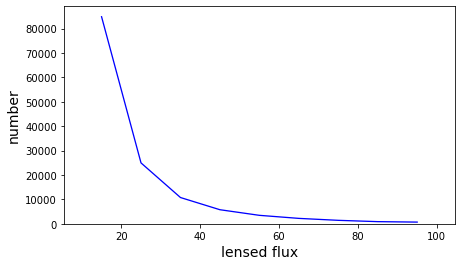

In [29]:
# sources by lensed flux 

import numpy as np
import matplotlib.pyplot as plt


# data for criterion S500>10 mJy, frac=0.25
data10 = np.loadtxt('lenses_submm_0.25_10.txt')  # add pathway if necessary

# data fields for lenses_submm_0.25_10.txt
#  [0] zl      [1] zs     [2] b    [3] sigl    [4] ql
#  [5] rl      [6] ml     [7] xs   [8] ys      [9] qs     
# [10] ps     [11] rs    [12] ms  [13] mag    [14] msrc   
# [15] seeing [16] rfsn
# note ms   is log_unlensed  source flux at 500um in submm data
# note msrc is lensed        source flux at 500um in submm data


# set up bins
bins = np.arange(10,110,10)
number=np.size(bins)-1
binmid=np.zeros(number)
for i in range(number):
    binmid[i]=(bins[i]+bins[i+1])/2.0
    i+=1
    
     
fig, ax = plt.subplots(figsize=(7,4))
    
# calculate histogram data and plot
lensed_flux =  data10[:,14]
counts1, bins1, bars1 = plt.hist(lensed_flux, bins=bins,\
         density=False, histtype='bar',color='white')
counts1 = counts1*(1/0.25)  # whole sky number (frac is 0.25) 

ax.plot(binmid, counts1, color='blue',linewidth=1.3) 
ax.set_xlabel('lensed flux',fontsize=14)
ax.set_ylabel('number', fontsize=14)


# print table of histogram
print("Number of lensed sources by flux")
print('bins  mid  number')
for i in np.arange(number):
    print(bins[i],bins[i+1],' ',int(binmid[i]),'  ', '{:,}'.format(int(counts1[i])))
ok=np.where(lensed_flux >= 100) 
over100 = lensed_flux[ok]
print('Over 100     ', '{:,}'.format(int(4.0*over100.size)))
print('Total      ', '{:,}'.format(int(4.0*lensed_flux.size)))



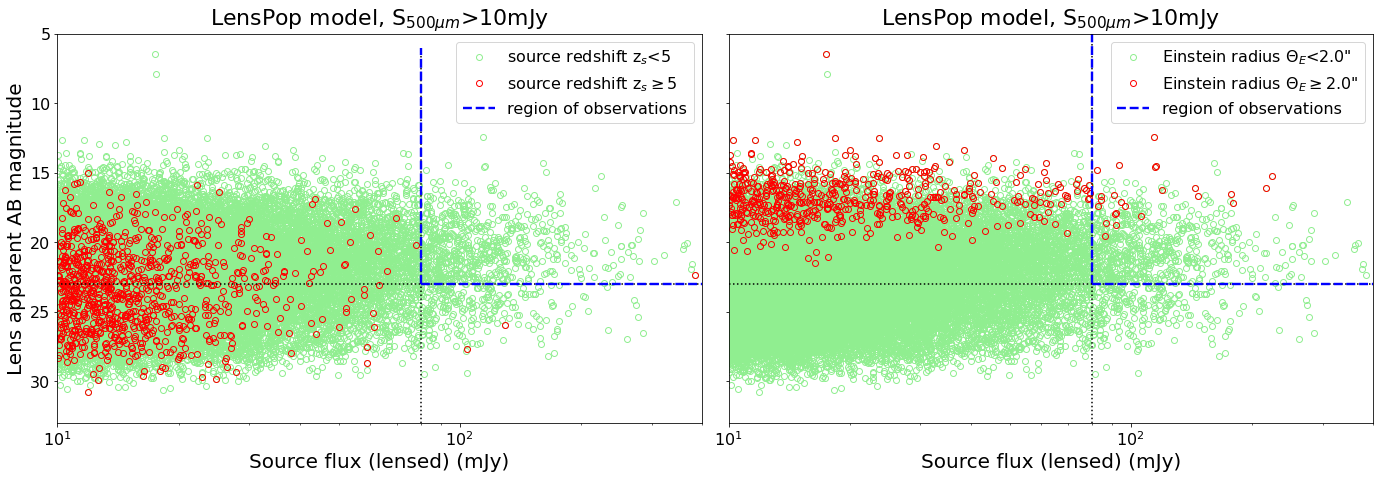

In [33]:
# Plot source lensed flux asgainst foreground lens apparent magnitude,
# highlighting high redshift sources and high Einstein radius sources
# and region of observations to date 


import numpy as np
import matplotlib.pyplot as plt


# data for criterion S500>10 mJy
data10 = np.loadtxt('lenses_submm_0.25_10.txt')

# data fields for lenses_submm_0.25_10.txt
#  [0] zl      [1] zs     [2] b    [3] sigl    [4] ql
#  [5] rl      [6] ml     [7] xs   [8] ys      [9] qs     
# [10] ps     [11] rs    [12] ms  [13] mag    [14] msrc   
# [15] seeing [16] rfsn

# note ms   is log_unlensed  source flux at 500um in submm data
# note msrc is lensed        source flux at 500um in submm data


sourceflux    = data10[:,14]
lensmagnitude = data10[:,6]


fig, ax = plt.subplots(1,2,sharey=True,figsize=(19,6))
fig.tight_layout()

ax[0].plot(sourceflux,lensmagnitude,'o',color='lightgreen',mfc='none',label='source redshift z$_s$<5')

# over plot high-z sources in  red
high_zs = np.where(data10[:,1]>=5.0)
data_high_zs = data10[high_zs]

ax[0].plot(data_high_zs[:,14],data_high_zs[:,6],'o',color='red',mfc='none',label='source redshift z$_s\geq$5')
ax[0].vlines(80,35,6, linestyle='dotted', color='black')
ax[0].vlines(80,23,6,linestyle='dashed', linewidth=2.4,color='blue',label='region of observations')
ax[0].hlines(23,10,500, linestyle='dotted', color='black')
ax[0].hlines(23,80,500, linestyle='dashed', linewidth=2.4,color='blue')
ax[0].set_xlim([10.0,400.0])
ax[0].set_ylim(33,6)
ax[0].set_title('LensPop model, S$_{500\mu m}$>10mJy', fontsize=22)
ax[0].set_xlabel('Source flux (lensed) (mJy)', fontsize=20)
ax[0].set_ylabel('Lens apparent AB magnitude', fontsize=20)
ax[0].set_xscale('log')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].legend(fontsize=16, loc='upper right')



ax[1].plot(sourceflux,lensmagnitude,'o',color='lightgreen',mfc='none',label='Einstein radius $\Theta_E$<2.0"')

# over plot high-theta_einstein sources in  red
high_theta = np.where(data10[:,2]>=2.0)
data_high_theta = data10[high_theta]

ax[1].plot(data_high_theta[:,14],data_high_theta[:,6],'o',color='red',mfc='none',label='Einstein radius $\Theta_E\geq$2.0"')
ax[1].vlines(80,35,5, linestyle='dotted', color='black')
ax[1].vlines(80,23,5,linestyle='dashed', linewidth=2.4,color='blue',label='region of observations')
ax[1].hlines(23,10,500, linestyle='dotted', color='black')
ax[1].hlines(23,80,500, linestyle='dashed', linewidth=2.4,color='blue')
ax[1].set_xlim([10.0,400.0])
ax[1].set_ylim(33,5)
ax[1].set_title('LensPop model, S$_{500\mu m}$>10mJy', fontsize=22)
ax[1].set_xlabel('Source flux (lensed) (mJy)', fontsize=20)
ax[1].set_xscale('log')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].legend(fontsize=16)
